In [1]:
suppressPackageStartupMessages({
    library(data.table)
    library(dplyr)
    library(glue)
    library(ggplot2)
    library(sf)
    library(patchwork)
    library(ggthemes)
    library(purrr)
    library(Matrix)
    library(tidyr)
    library(Seurat)
    library(uwot)
    library(igraph)
    library(future)
    library(scran)
    library(DESeq2)
    library(pheatmap)
    library(furrr)
})
fig.size <- function(h, w) {
    options(repr.plot.height = h, repr.plot.width = w)
}


In [2]:
dmt1 <- readRDS('../data/dmt1.rds')
aggs1 <- readRDS('../data/aggs1.rds')
gene_ls = read.table('../data/VizgenLungHacohen/cells/genes.txt', header=FALSE)$V1

In [3]:
gene_ls = read.table('../data/VizgenLungHacohen/cells/genes.txt', header=FALSE)$V1

In [4]:
library(Matrix)
# https://github.com/immunogenomics/singlecellmethods/blob/master/R/normalizeData.R
normalizeData <- function(A, scaling_factor = 1e4, method='log') {
    if(!'dgCMatrix' %in% class(A)) A <- as(A, "dgCMatrix")
    
    if (method == "log") {
        A@x <- A@x / rep.int(Matrix::colSums(A), diff(A@p))
        A@x <- scaling_factor * A@x
        A@x <- log(1 + A@x)
    } else if (method == "fft") {
        A@x <- A@x / rep.int(Matrix::colSums(A), diff(A@p))
        A@x <- scaling_factor * A@x
        A@x <- sqrt(A@x) + sqrt(1 + A@x)
    } else if (method == "geneCLR") {
        A@x <- as.numeric(normalizeCLR_dgc(A@x, A@p, A@i, ncol(A), nrow(A), 1))        
    } else if (method == "cellCLR") {
        A@x <- as.numeric(normalizeCLR_dgc(A@x, A@p, A@i, ncol(A), nrow(A), 2))
    } else {
        stop(sprintf("ERROR: method %s not implemented", method))
    }

	return(A)
}

In [5]:
normalized_counts = normalizeData(dmt1$counts, scaling_factor=median(colSums(dmt1$counts)))
class(normalized_counts)

'as(<dgTMatrix>, "dgCMatrix")' is deprecated.
Use 'as(., "CsparseMatrix")' instead.
See help("Deprecated") and help("Matrix-deprecated").



[1] "dgCMatrix"
attr(,"package")
[1] "Matrix"

In [6]:
plot_gene <- function(counts, metadata, gene_name, gene_ls, size=0.5, zoomX=NULL, zoomY=NULL, alpha=0.5, title=NULL, title_size=15){
    maskX = TRUE
    maskY = TRUE
    if (!is.null(zoomX)){
        maskX = (metadata$X >= min(zoomX) & (metadata$X <= max(zoomX)))
    }
    if (!is.null(zoomY)){
        maskY = (metadata$Y >= min(zoomY) & (metadata$Y <= max(zoomY)))
    }
    mask = maskX & maskY
    metadata = metadata[mask, ]
    gene_index = which(gene_ls==gene_name)
    counts = counts[gene_index, mask]
    if (is.null(title)){
        title = gene_name
    }
    plot_data = metadata[,c('X','Y')]
    plot_data$value = counts
    p = ggplot(data=plot_data, aes(x = X, y = Y, color = value)) +
      geom_point(alpha=alpha) +
      theme_minimal()+
      ggtitle(title) +
      theme(plot.title = element_text(size=title_size)) + 
      scale_color_viridis_c()  # Optional: use a color scale
    return(p)
}

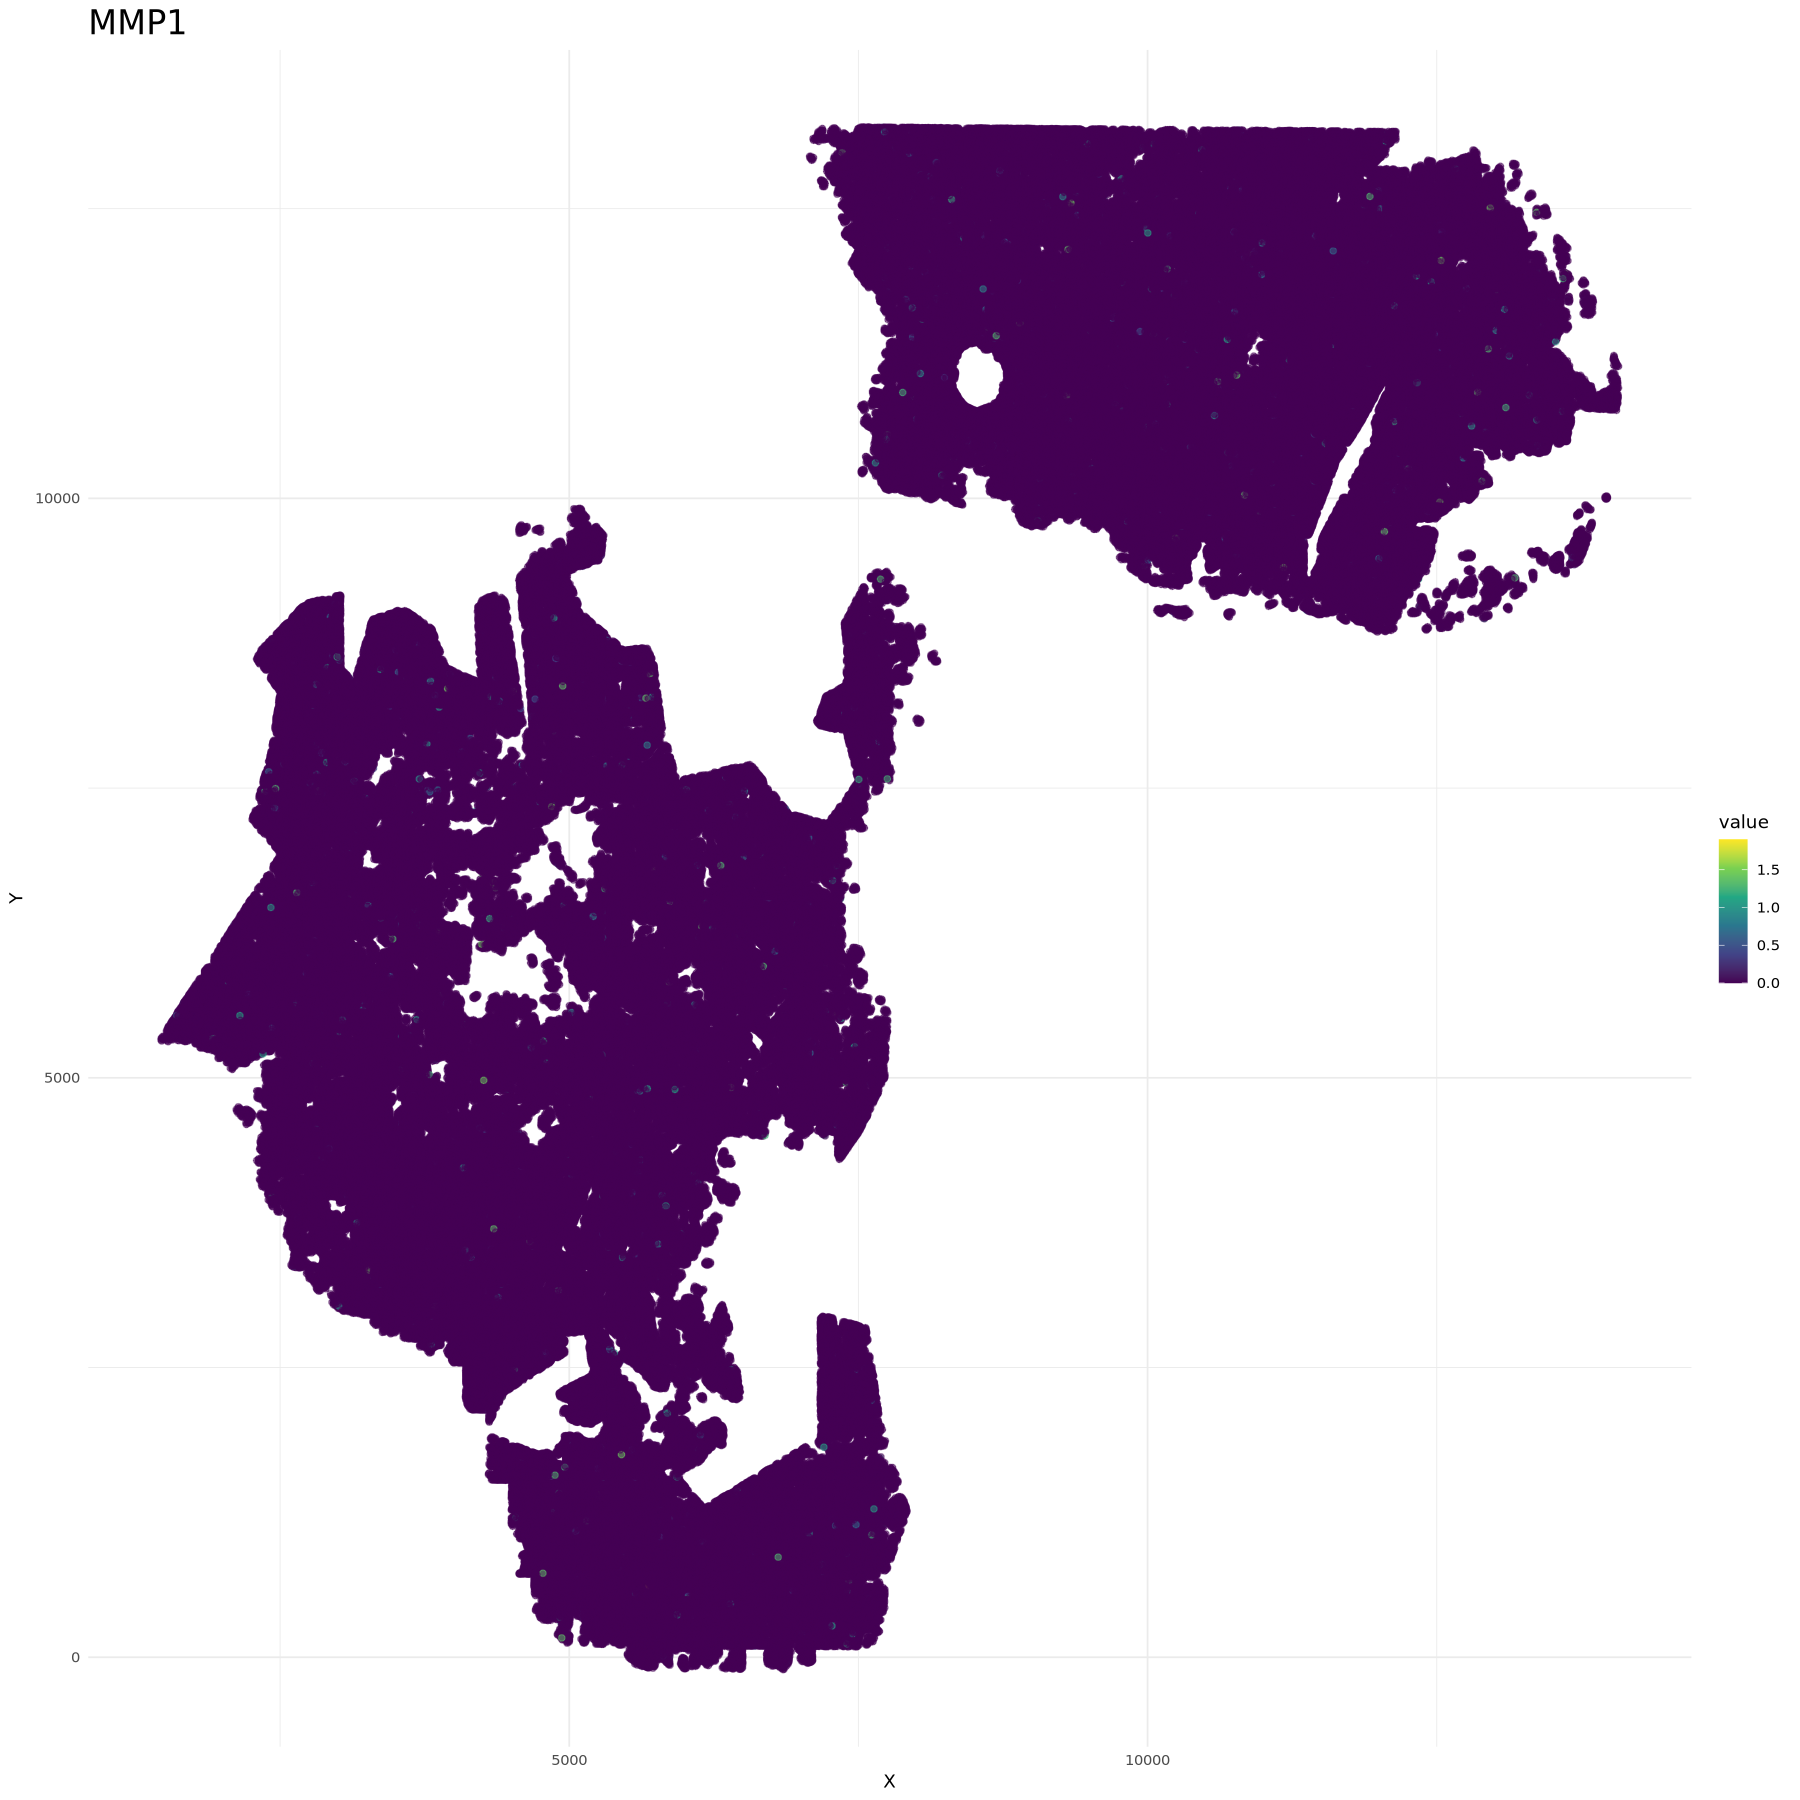

In [87]:
fig.size(15,15)
plot_gene(normalized_counts, dmt1$pts, 'MMP1', gene_ls=gene_ls, zoomX=NULL, zoomY=NULL, size=0.001, title_size=20)


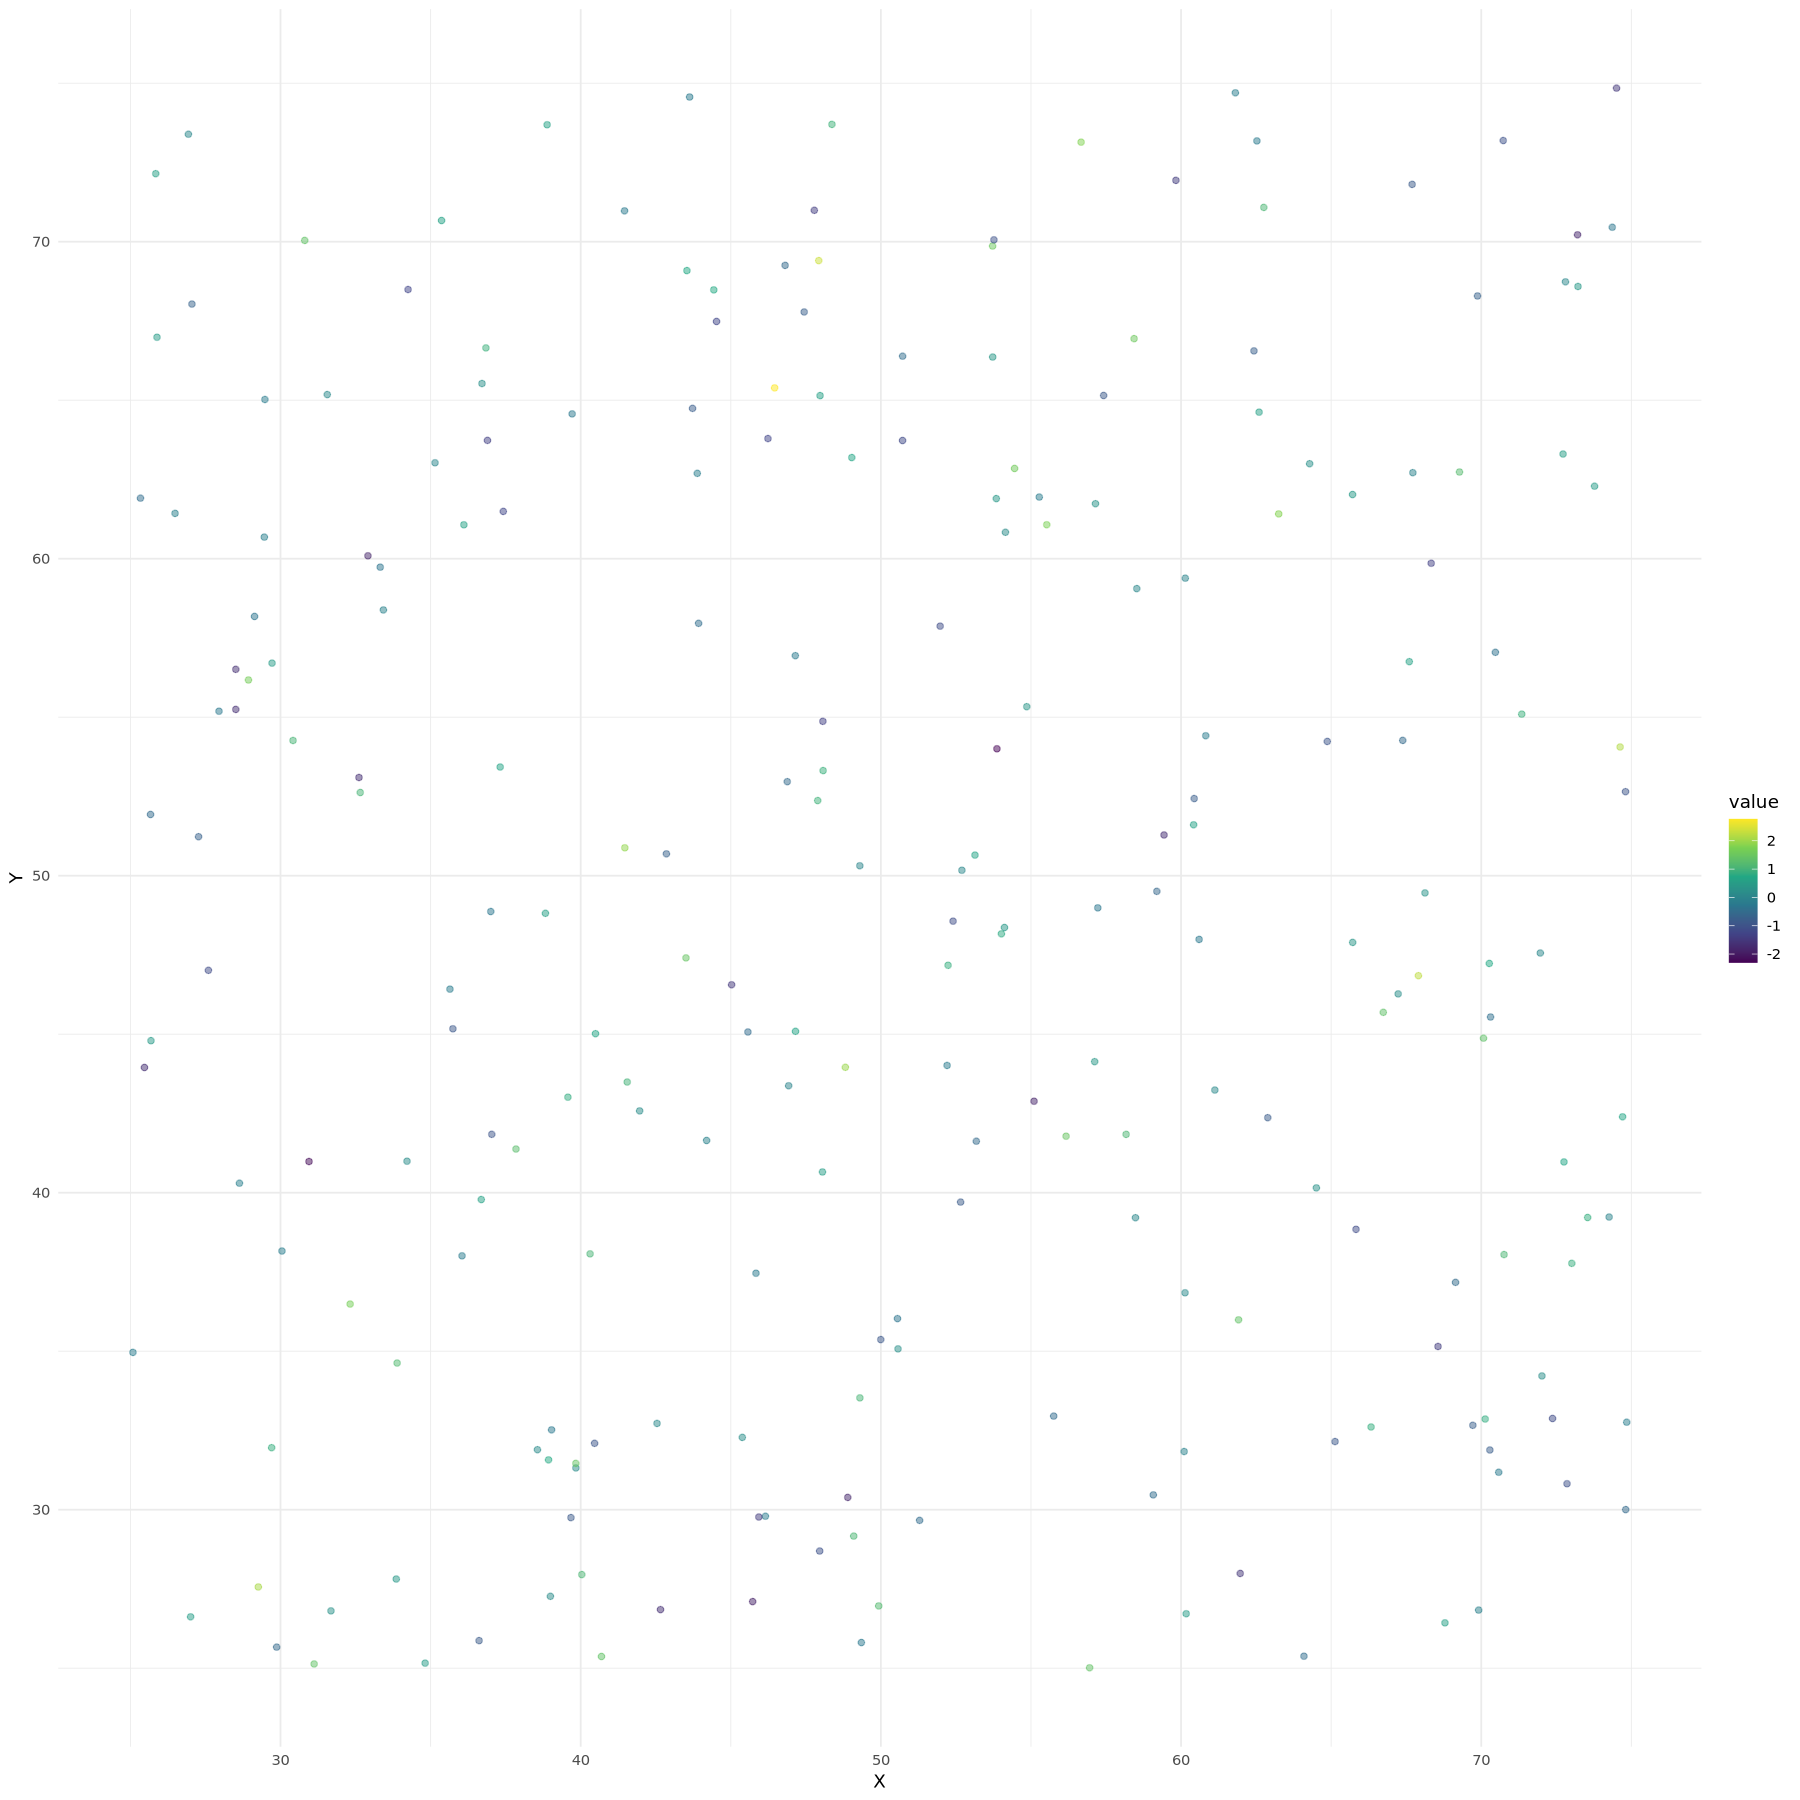

In [43]:
plot_gene(random_matrix, random_data, gene_name='CD74', gene_ls=gene_ls, zoomX=c(25,75), zoomY=c(25,75), size=6)

## SPP1 macrophage cell colocalization

X        Y         ORIG_ID type_lvl1 type_lvl2        hubID f        
1     7088.810  252.2779   67    Myeloid   SPP1+ Macrophage H260  1.2096640
2     7087.143  459.4626  162    Myeloid   SPP1+ Macrophage H419  2.6644107
3     7102.997  724.9525  291    Myeloid   SPP1+ Macrophage H419  5.1293964
4     7106.904  832.8841  301    Myeloid   SPP1+ Macrophage H419  1.7678099
5     7118.736 1282.8179  500    Myeloid   SPP1+ Macrophage H419  1.7954016
6     7115.490 1448.1396  604    Myeloid   SPP1+ Macrophage H260  1.3515118
7     7122.677 1643.6246  710    Myeloid   SPP1+ Macrophage H419  4.2035839
8     7098.603 4668.2385  816    Myeloid   SPP1+ Macrophage H428  1.3044897
9     7086.086 4839.4109  852    Myeloid   SPP1+ Macrophage H624  1.2430214
10    7122.007 4769.5427  863    Myeloid   SPP1+ Macrophage H624  1.1545371
11    7107.485 4834.2297  889    Myeloid   SPP1+ Macrophage H624  1.1440932
12    7093.006 4946.5217 1125    Myeloid   SPP1+ Macrophage H260  1.1199532
13    7088.257 5184.1448 1251    Myeloid   SPP1+ Macrophage H430  2.7810497
14    7122.935 5254.9917 1299    Myeloid   SPP1+ Macrophage H430  2.7573435
15    7109.125 5428.2180 1354    Myeloid   SPP1+ Macrophage H626  1.3432947
16    7089.308 5436.2791 1358    Myeloid   SPP1+ Macrophage H626  1.8747765
17    7105.298 5460.7161 1364    Myeloid   SPP1+ Macrophage H626  2.2272074
18    7103.684 5447.9473 1409    Myeloid   SPP1+ Macrophage H626  1.2109122
19    7154.283 5705.9773 1567    Myeloid   SPP1+ Macrophage H260  2.5133048
20    7113.437 5602.1370 1583    Myeloid   SPP1+ Macrophage H260  0.8507219
21    7133.107 5737.5076 1606    Myeloid   SPP1+ Macrophage H260  0.9641139
22    7099.719 5831.2573 1720    Myeloid   SPP1+ Macrophage H426  1.2254244
23    7149.190 5847.5872 1728    Myeloid   SPP1+ Macrophage H426  1.9120417
24    7122.339 5843.6792 1757    Myeloid   SPP1+ Macrophage H426  1.8538455
25    7087.575 5843.1152 1787    Myeloid   SPP1+ Macrophage H426  1.5071541
26    7149.457 6010.3440 1870    Myeloid   SPP1+ Macrophage H260  1.0886258
27    7140.757 6089.1252 1918    Myeloid   SPP1+ Macrophage H808  1.3802950
28    7129.715 6035.2913 1919    Myeloid   SPP1+ Macrophage H260  1.5451733
29    7144.351 6284.2144 2004    Myeloid   SPP1+ Macrophage H627  1.5106436
30    7162.594 6286.3340 2183    Myeloid   SPP1+ Macrophage H805  1.6381495
⋮     ⋮        ⋮         ⋮       ⋮         ⋮                ⋮     ⋮        
18570 11334.24 10829.95  662172  Myeloid   SPP1+ Macrophage H286  1.1364245
18571 11394.84 10840.25  662190  Myeloid   SPP1+ Macrophage H286  1.2501537
18572 11397.80 10882.85  662241  Myeloid   SPP1+ Macrophage H286  1.1480343
18573 11431.65 10937.15  662339  Myeloid   SPP1+ Macrophage H696  1.5807215
18574 11428.53 10941.43  662471  Myeloid   SPP1+ Macrophage H696  1.6073815
18575 11362.15 10940.77  662560  Myeloid   SPP1+ Macrophage H696  1.5133100
18576 11361.03 10743.13  662598  Myeloid   SPP1+ Macrophage H286  1.3344618
18577 11365.71 10748.69  662647  Myeloid   SPP1+ Macrophage H286  1.0831877
18578 11236.49 10729.15  662682  Myeloid   SPP1+ Macrophage H696  1.9824459
18579 11437.94 10912.43  663015  Myeloid   SPP1+ Macrophage H696  1.0547866
18580 11468.55 10843.76  663084  Myeloid   SPP1+ Macrophage H696  1.8130032
18581 11563.29 10978.27  663249  Myeloid   SPP1+ Macrophage H469  1.5651895
18582 11544.97 11147.51  663398  Myeloid   SPP1+ Macrophage H696  1.2993443
18583 11457.00 11078.12  663415  Myeloid   SPP1+ Macrophage H696  1.1811608
18584 11496.36 10986.45  663420  Myeloid   SPP1+ Macrophage H696  1.6876376
18585 11525.64 11122.64  663431  Myeloid   SPP1+ Macrophage H696  2.0526289
18586 11477.77 10982.29  663452  Myeloid   SPP1+ Macrophage H696  2.1118946
18587 11454.27 11084.70  663469  Myeloid   SPP1+ Macrophage H455  0.9898675
18588 11550.82 11168.95  663575  Myeloid   SPP1+ Macrophage H696  1.7478702
18589 11477.32 11207.41  663609  Myeloid   SPP1+ Macrophage H455  2.4196624
18590 11441.53 11262.20  663673  Myeloid   SPP1+ Macro

In [7]:
refocus_bbox = function(shapes) {
    if (length(shapes) == 1) {
        shapes = st_sfc(st_polygon(shapes[[1]]))
    } else {
        shapes = shapes %>% map(identity) %>% st_sfc() 
    }
    return(shapes)
}

In [17]:
# Fitler out the cells without type_lvl2
filter_index = which(dmt1$pts$type_lvl2!='')
dmt1$pts = dmt1$pts[filter_index, ]
dmt1$counts = dmt1$counts[, filter_index]
indx_spp1_mac = which(dmt1$pts$type_lvl2=='SPP1+ Macrophage')
dmt1$pts[indx_spp1_mac,]

X        Y         ORIG_ID type_lvl1 type_lvl2        hubID f        
1     7088.810  252.2779   67    Myeloid   SPP1+ Macrophage H260  1.2096640
2     7087.143  459.4626  162    Myeloid   SPP1+ Macrophage H419  2.6644107
3     7102.997  724.9525  291    Myeloid   SPP1+ Macrophage H419  5.1293964
4     7106.904  832.8841  301    Myeloid   SPP1+ Macrophage H419  1.7678099
5     7118.736 1282.8179  500    Myeloid   SPP1+ Macrophage H419  1.7954016
6     7115.490 1448.1396  604    Myeloid   SPP1+ Macrophage H260  1.3515118
7     7122.677 1643.6246  710    Myeloid   SPP1+ Macrophage H419  4.2035839
8     7098.603 4668.2385  816    Myeloid   SPP1+ Macrophage H428  1.3044897
9     7086.086 4839.4109  852    Myeloid   SPP1+ Macrophage H624  1.2430214
10    7122.007 4769.5427  863    Myeloid   SPP1+ Macrophage H624  1.1545371
11    7107.485 4834.2297  889    Myeloid   SPP1+ Macrophage H624  1.1440932
12    7093.006 4946.5217 1125    Myeloid   SPP1+ Macrophage H260  1.1199532
13    7088.257 5184.1448 1251    Myeloid   SPP1+ Macrophage H430  2.7810497
14    7122.935 5254.9917 1299    Myeloid   SPP1+ Macrophage H430  2.7573435
15    7109.125 5428.2180 1354    Myeloid   SPP1+ Macrophage H626  1.3432947
16    7089.308 5436.2791 1358    Myeloid   SPP1+ Macrophage H626  1.8747765
17    7105.298 5460.7161 1364    Myeloid   SPP1+ Macrophage H626  2.2272074
18    7103.684 5447.9473 1409    Myeloid   SPP1+ Macrophage H626  1.2109122
19    7154.283 5705.9773 1567    Myeloid   SPP1+ Macrophage H260  2.5133048
20    7113.437 5602.1370 1583    Myeloid   SPP1+ Macrophage H260  0.8507219
21    7133.107 5737.5076 1606    Myeloid   SPP1+ Macrophage H260  0.9641139
22    7099.719 5831.2573 1720    Myeloid   SPP1+ Macrophage H426  1.2254244
23    7149.190 5847.5872 1728    Myeloid   SPP1+ Macrophage H426  1.9120417
24    7122.339 5843.6792 1757    Myeloid   SPP1+ Macrophage H426  1.8538455
25    7087.575 5843.1152 1787    Myeloid   SPP1+ Macrophage H426  1.5071541
26    7149.457 6010.3440 1870    Myeloid   SPP1+ Macrophage H260  1.0886258
27    7140.757 6089.1252 1918    Myeloid   SPP1+ Macrophage H808  1.3802950
28    7129.715 6035.2913 1919    Myeloid   SPP1+ Macrophage H260  1.5451733
29    7144.351 6284.2144 2004    Myeloid   SPP1+ Macrophage H627  1.5106436
30    7162.594 6286.3340 2183    Myeloid   SPP1+ Macrophage H805  1.6381495
⋮     ⋮        ⋮         ⋮       ⋮         ⋮                ⋮     ⋮        
18570 11334.24 10829.95  662172  Myeloid   SPP1+ Macrophage H286  1.1364245
18571 11394.84 10840.25  662190  Myeloid   SPP1+ Macrophage H286  1.2501537
18572 11397.80 10882.85  662241  Myeloid   SPP1+ Macrophage H286  1.1480343
18573 11431.65 10937.15  662339  Myeloid   SPP1+ Macrophage H696  1.5807215
18574 11428.53 10941.43  662471  Myeloid   SPP1+ Macrophage H696  1.6073815
18575 11362.15 10940.77  662560  Myeloid   SPP1+ Macrophage H696  1.5133100
18576 11361.03 10743.13  662598  Myeloid   SPP1+ Macrophage H286  1.3344618
18577 11365.71 10748.69  662647  Myeloid   SPP1+ Macrophage H286  1.0831877
18578 11236.49 10729.15  662682  Myeloid   SPP1+ Macrophage H696  1.9824459
18579 11437.94 10912.43  663015  Myeloid   SPP1+ Macrophage H696  1.0547866
18580 11468.55 10843.76  663084  Myeloid   SPP1+ Macrophage H696  1.8130032
18581 11563.29 10978.27  663249  Myeloid   SPP1+ Macrophage H469  1.5651895
18582 11544.97 11147.51  663398  Myeloid   SPP1+ Macrophage H696  1.2993443
18583 11457.00 11078.12  663415  Myeloid   SPP1+ Macrophage H696  1.1811608
18584 11496.36 10986.45  663420  Myeloid   SPP1+ Macrophage H696  1.6876376
18585 11525.64 11122.64  663431  Myeloid   SPP1+ Macrophage H696  2.0526289
18586 11477.77 10982.29  663452  Myeloid   SPP1+ Macrophage H696  2.1118946
18587 11454.27 11084.70  663469  Myeloid   SPP1+ Macrophage H455  0.9898675
18588 11550.82 11168.95  663575  Myeloid   SPP1+ Macrophage H696  1.7478702
18589 11477.32 11207.41  663609  Myeloid   SPP1+ Macrophage H455  2.4196624
18590 11441.53 11262.20  663673  Myeloid   SPP1+ Macro

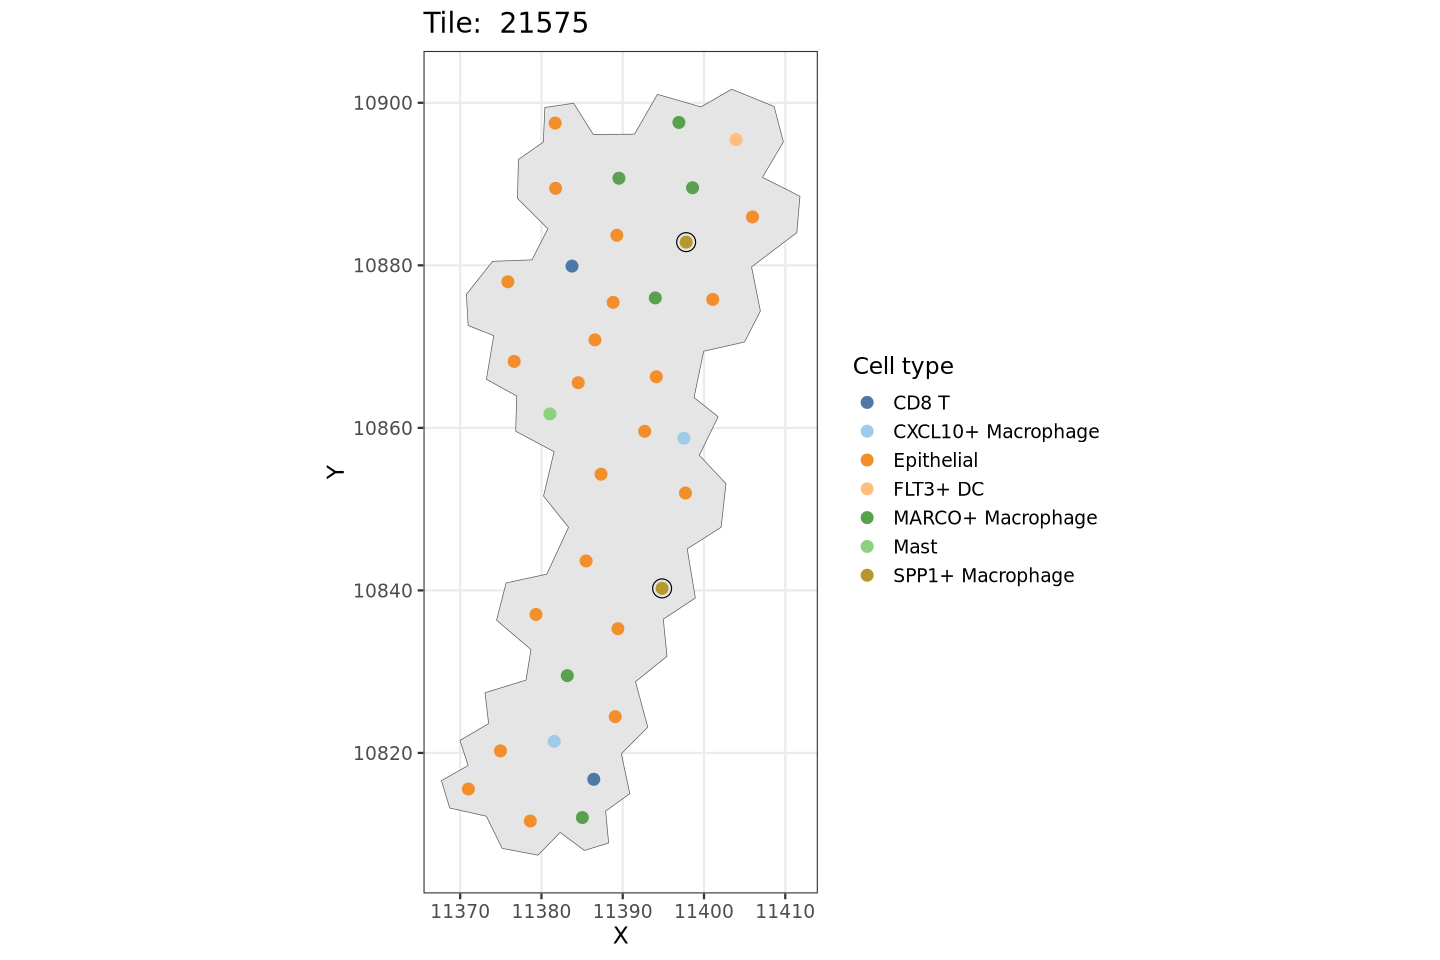

In [134]:
obj = dmt1
i_tile = 21575
plt_tiles = aggs1$meta_data[i_tile, ][, shape := refocus_bbox(shape)]
# Get cells in tile
i_cells = which(obj$pts$agg_id == i_tile)
focused_cell = which(obj$pts$type_lvl2 == 'SPP1+ Macrophage' & obj$pts$agg_id == i_tile)
fig.size(8, 12)

ggplot() +
    geom_sf(aes(geometry = st_sfc(shape)), plt_tiles) +
    geom_point(aes(X, Y, color = type_lvl2), fill = NA, obj$pts[i_cells, ], size=3) +
    theme_bw(base_size=14) +
    coord_sf() +
    geom_point(data = obj$pts[focused_cell, ], shape=21, size= 5, color='black', fill = NA,  aes(X,Y)) +
    scale_color_tableau('Tableau 20') +
    labs(color = 'Cell type') +
    ggtitle(paste("Tile: ", i_tile)) +
    NULL


In [11]:
# Where are the neutrophils and SPP1+ macrophage?
# No neutrophils in our dataset
# What if we find 10 nearest neighbors of SPP1 macrophage?


In [18]:
library(RANN)
coords = dmt1$pts[, c('X','Y')]
nearest_neigh <- nn2(coords, k=10)
#head(nearest_neigh$nn.idx[indx_spp1_mac,])

find_type <- function(row, types){
    return(types[row])
}
neighbors_true <- sapply(nearest_neigh$nn.idx[indx_spp1_mac,], find_type, types = dmt1$pts$type_lvl2)
neighbors_null <- sapply(nearest_neigh$nn.idx[indx_spp1_mac,], find_type, types = sample(dmt1$pts$type_lvl2))


In [10]:
dmt1$pts[nearest_neigh$nn.idx[583,]]

X        Y        ORIG_ID type_lvl1  type_lvl2         hubID f        
1  7115.490 1448.140  604    Myeloid    SPP1+ Macrophage  H260  1.3515118
2  7111.036 1449.549  631    Epithelial Epithelial        H260  0.8659513
3  7118.338 1442.301  630    Myeloid    MARCO+ Macrophage H260  1.6723347
4  7123.618 1449.023 8634    Epithelial Epithelial        H260  1.2765565
5  7117.333 1458.777  552    Epithelial Epithelial        H260  1.1146046
6  7124.724 1442.464 8540    Epithelial Epithelial        H260  1.2449460
7  7113.897 1437.319  602    Myeloid    MARCO+ Macrophage H260  0.9622512
8  7111.347 1459.315  609    Epithelial Epithelial        H260  1.2996025
9  7122.117 1436.942  662    Epithelial Epithelial        H260  1.0428164
10 7125.054 1457.278 8637    Epithelial Epithelial        H260  1.1431993
   agg_id spatial_cluster
1  43     1              
2  43     1              
3  43     1              
4  44     0              
5  44     0              
6  42     1              
7  43     1              
8  44     0              
9  42     1              
10 44     0

In [12]:
head(dmt1$pts[indx_spp1_mac,])

X        Y         ORIG_ID type_lvl1  type_lvl2         hubID f        agg_id
1 7088.810  252.2779  67     Myeloid    SPP1+ Macrophage  H260  1.209664  4    
2 7091.623  425.6853 167     Vascular   Vascular          H419  2.356360 10    
3 7110.434  846.2141 303     Myeloid    MARCO+ Macrophage H419  1.532002 24    
4 7088.607  755.9792 313     Vascular   Vascular          H419  2.001437 22    
5 7114.629 1281.5507 516     Vascular   Vascular          H419  1.889039 36    
6 7095.466 1483.6021 623     Lymphocyte Treg              H260  1.822507 48    
  spatial_cluster
1 13             
2 2              
3 5              
4 2              
5 3              
6 5

In [21]:
length(neighbors_true)

[1] 185990

In [22]:
sort(round(table(neighbors_true) / length(neighbors_true) * 100,2) , decreasing=TRUE)

neighbors_true
                  Epithelial             SPP1+ Macrophage 
                       31.82                        29.56 
                  Fibroblast            MARCO+ Macrophage 
                        8.92                         7.86 
           MERTK+ Macrophage       FOLR2+CD14+ Macrophage 
                        3.83                         2.71 
                    Vascular                         Treg 
                        2.14                         1.48 
        FCN1+LYZ+ Macrophage                        CD8 T 
                        1.29                         1.24 
          MMP1+SOX4+ Myeloid NCAM1+ S100B+ SEPP1+ Myeloid 
                        1.24                         1.18 
                      Plasma                          ILC 
                        1.18                         1.10 
          CXCL10+ Macrophage                        CD4 T 
                        1.05                         0.65 
              CD1C+ITGAX+ DC             

In [29]:
sort(round(table(neighbors_null) / length(neighbors_null) * 100,2) , decreasing=TRUE)

neighbors_null
                  Epithelial                   Fibroblast 
                       49.40                        13.09 
                    Vascular            MARCO+ Macrophage 
                        7.01                         3.96 
           MERTK+ Macrophage             SPP1+ Macrophage 
                        3.27                         3.12 
                        Treg                       Plasma 
                        2.50                         2.40 
      FOLR2+CD14+ Macrophage                        CD4 T 
                        2.16                         2.11 
                       CD8 T                          ILC 
                        1.60                         1.47 
        FCN1+LYZ+ Macrophage           CXCL10+ Macrophage 
                        1.40                         1.23 
NCAM1+ S100B+ SEPP1+ Myeloid           MMP1+SOX4+ Myeloid 
                        0.85                         0.66 
                           B             

## Where are these SPP1+ macrophages?

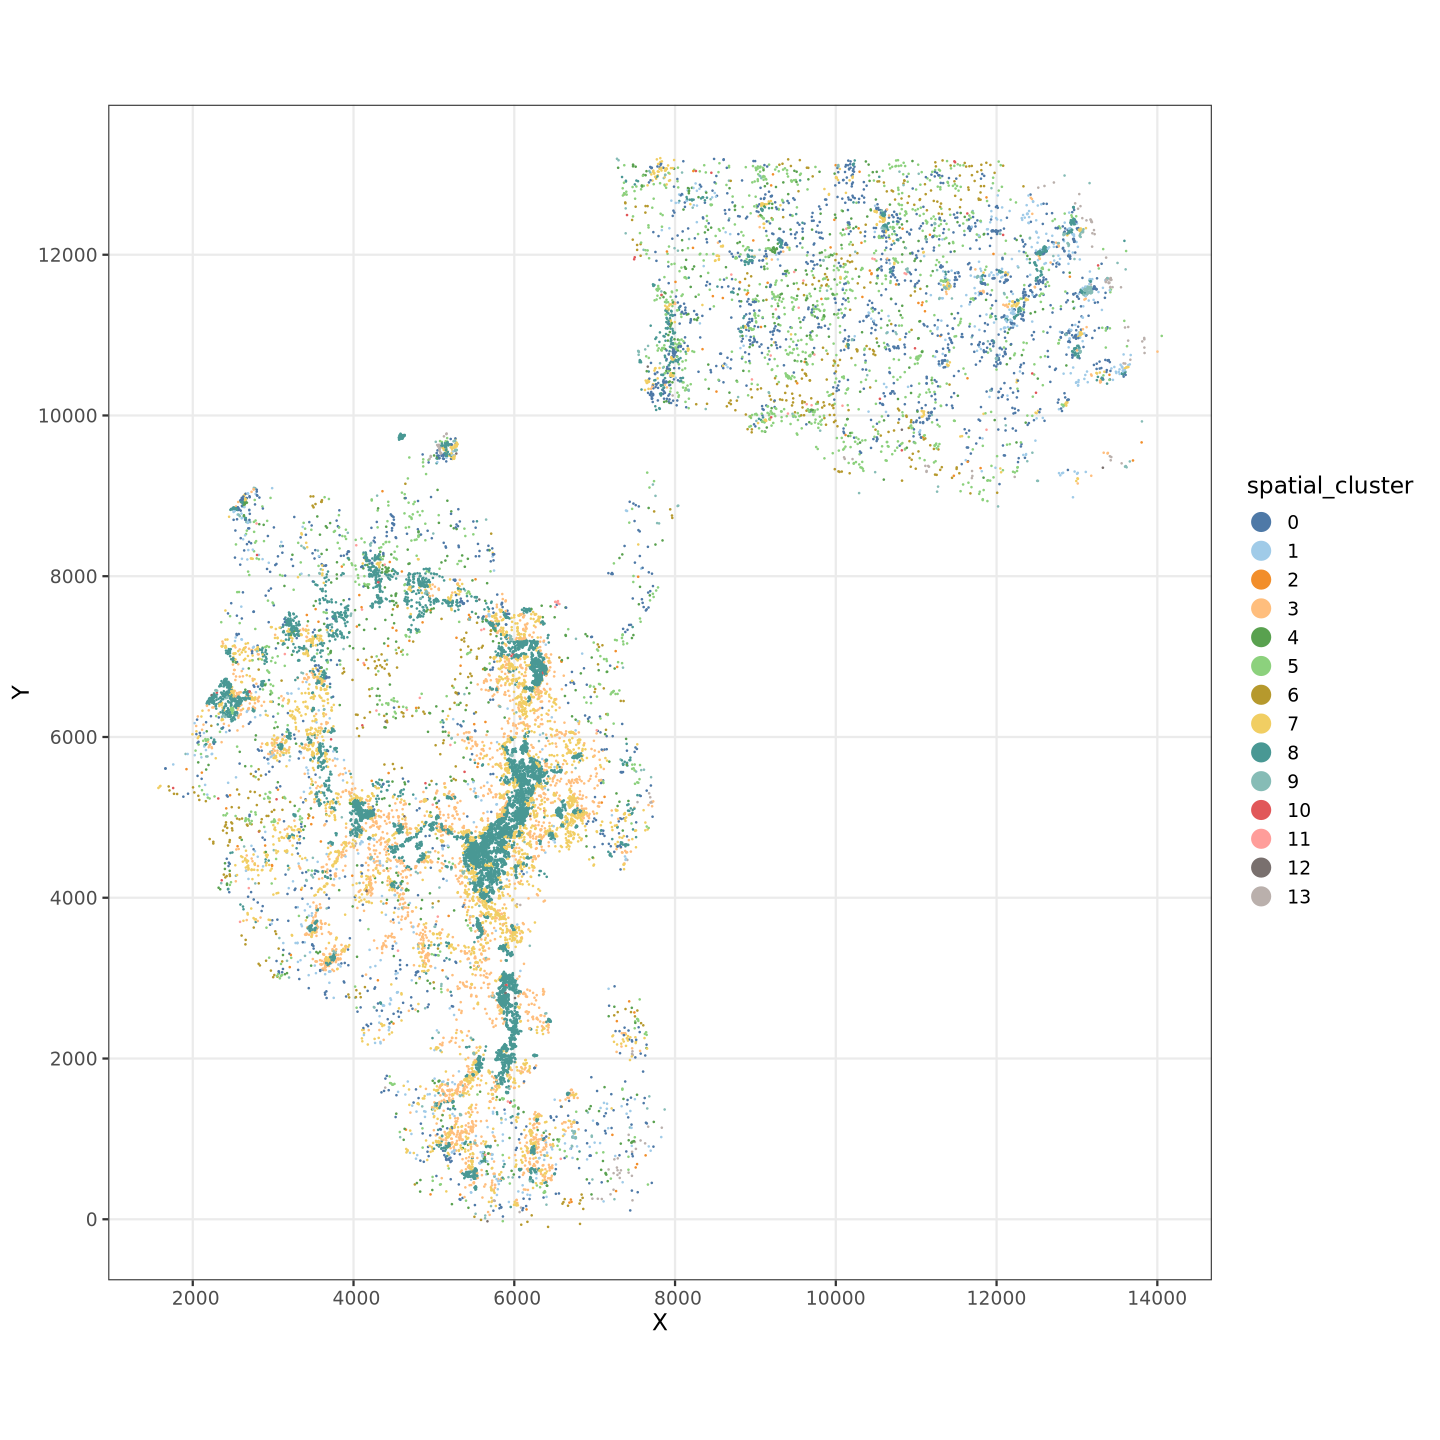

In [27]:
spp1_mac = dmt1$pts[indx_spp1_mac,]
fig.size(12,12)

plot_cell <- function(plot_data){
    
    ggplot() +
        geom_point(data=plot_data, aes(X, Y, color=spatial_cluster),  size=0.1) +
        theme_bw(base_size=14) +
        coord_sf() +
        scale_color_tableau('Tableau 20') +
        guides(color=guide_legend(override.aes=list(size=5))) + # Increase marker size
        NULL
}
plot_cell(spp1_mac)

In [16]:
# What are the cell type composition in spatial cluster 8?

spatial_cluster8 = dmt1$pts[dmt1$pts$spatial_cluster==8,]
sort(table(spatial_cluster8$type_lvl2) / length(spatial_cluster8$type_lvl2) * 100, decreasing=TRUE)


            SPP1+ Macrophage                   Fibroblast 
                 27.34315372                  15.60448786 
           MARCO+ Macrophage                   Epithelial 
                 13.49030682                  11.88368188 
           MERTK+ Macrophage       FOLR2+CD14+ Macrophage 
                  7.10196917                   5.22057701 
                    Vascular         FCN1+LYZ+ Macrophage 
                  2.48816975                   2.15997558 
          MMP1+SOX4+ Myeloid NCAM1+ S100B+ SEPP1+ Myeloid 
                  1.82033277                   1.66005190 
                       CD8 T                         Treg 
                  1.59517631                   1.59136010 
                         ILC           CXCL10+ Macrophage 
                  1.54938177                   1.49595482 
                      Plasma               CD1C+ITGAX+ DC 
                  1.34330637                   0.76324225 
              LAMP3+CD1C+ DC                     FLT3+ 

## Gene program score

In [4]:
programs = read.csv('../data/NMF41.csv', header=1)
# Don't include MP24.Cilia and MP11.Translation.initiation due to non-overlapping genes
lung_programs = c('MP1..Cell.Cycle...G2.M','MP5.Stress','MP6.Hypoxia','MP2..Cell.Cycle...G1.S','MP12.EMT.I','MP18.Interferon.MHC.II..II.','MP13.EMT.II','MP14.EMT.III',
                 'MP10.Protein.maturation','MP8.Proteasomal.degradation','MP19.Epithelial.Senescence','MP3..Cell.Cylce.HMG.rich','MP23.Secreted.II','MP30.PDAC.classical')
lung_programs = programs[lung_programs]
# Get just the epithelial cells
epi_idx = which(dmt1$pts$type_lvl1=='Epithelial')
gene_ls = read.table('../data/VizgenLungHacohen/cells/genes.txt', header=FALSE)$V1


In [5]:
i = 3
intersected_genes = sapply(lung_programs, intersect, gene_ls)


In [31]:
lengths(intersected_genes)

MP1..Cell.Cycle...G2.M                  MP5.Stress 
                          7                          12 
                MP6.Hypoxia      MP2..Cell.Cycle...G1.S 
                          5                           2 
                 MP12.EMT.I MP18.Interferon.MHC.II..II. 
                         11                           7 
                MP13.EMT.II                MP14.EMT.III 
                          8                           8 
    MP10.Protein.maturation MP8.Proteasomal.degradation 
                          6                           3 
 MP19.Epithelial.Senescence    MP3..Cell.Cylce.HMG.rich 
                          6                           4 
           MP23.Secreted.II         MP30.PDAC.classical 
                          7                           8

In [32]:
intersected_genes

$MP1..Cell.Cycle...G2.M
[1] "TOP2A" "UBE2C" "HMGB2" "PTTG1" "MKI67" "UBE2S" "STMN1"

$MP5.Stress
 [1] "EGR1"   "FOS"    "JUN"    "JUNB"   "FOSB"   "IER2"   "DNAJB1" "HSPA1A"
 [9] "HSPA1B" "IRF1"   "ID2"    "CXCL2" 

$MP6.Hypoxia
[1] "VEGFA"    "IGFBP3"   "NDUFA4L2" "VIM"      "CA12"    

$MP2..Cell.Cycle...G1.S
[1] "PCNA"  "HMGB2"

$MP12.EMT.I
 [1] "COL1A2" "COL3A1" "TAGLN"  "FN1"    "TIMP1"  "VIM"    "MMP2"   "COL4A1"
 [9] "CXCL12" "TGFBI"  "ACTA2" 

$MP18.Interferon.MHC.II..II.
[1] "CD74"     "HLA-DRA"  "HLA-DRB1" "S100B"    "ANXA1"    "SEPP1"    "ISG15"   

$MP13.EMT.II
[1] "LAMB3"    "TGFBI"    "VIM"      "IL32"     "SERPINE1" "FN1"      "PDPN"    
[8] "INHBA"   

$MP14.EMT.III
[1] "ANXA1"  "TM4SF1" "KRT8"   "VIM"    "IL32"   "CKB"    "ISG15"  "STMN1" 

$MP10.Protein.maturation
[1] "HSPA5"    "HLA-C"    "AZGP1"    "TIMP1"    "SPP1"     "SERPINA1"

$MP8.Proteasomal.degradation
[1] "ANXA1" "PSMB1" "HSPA5"

$MP19.Epithelial.Senescence
[1] "S100A9" "LCN2"   "S100A8" "IL1RN"  "IGFBP3" "ANXA1" 

$MP3..Cell.Cylce.HMG.rich
[1] "STMN1"  "PCNA"   "HMGB2"  "RANBP1"

$MP23.Secreted.II
[1] "LCN2"   "CXCL1"  "CXCL8"  "CXCL2"  "S100A9" "SPINK1" "IGFBP3"

$MP30.PDAC.classical
[1] "SLC40A1" "LYZ"     "MUC13"   "SPINK1"  "REG4"    "OLFM4"   "CEACAM1"
[8] "ISG20"

In [6]:
meta = dmt1$pts[epi_idx, ]
counts = dmt1$counts[,epi_idx]
rownames(counts) = gene_ls
meta$counts = colSums(counts)
epi_seurat <- CreateSeuratObject(counts=counts, meta.data=meta)
epi_seurat <- NormalizeData(epi_seurat, normalization.method='LogNormalize', 
                              scale.factor = median(colSums(counts)))

epi_seurat <- FindVariableFeatures(epi_seurat)
epi_seurat <- ScaleData(epi_seurat)
#epi_seurat <- RunPCA(epi_seurat, npcs=10)

Warning message:
“Data is of class dgTMatrix. Coercing to dgCMatrix.”
Normalizing layer: counts

Finding variable features for layer counts

Centering and scaling data matrix



In [7]:
for (i in length(programs)){
    mod = AddModuleScore(object=epi_seurat, features=intersected_genes[i], ctrl=length(intersected_genes[i]), name=colnames(lung_programs)[i])
}


Warning message in AddModuleScore(object = epi_seurat, features = intersected_genes[i], :
“Could not find enough features in the object from the following feature lists: NA Attempting to match case...”


ERROR: Error in AddModuleScore(object = epi_seurat, features = intersected_genes[i], : The following feature lists do not have enough features present in the object: NA exiting...


In [355]:
head(x=mod1)

orig.ident nCount_RNA nFeature_RNA X        Y          ORIG_ID
Cell_1  Cell       30         23           7086.414  79.414864  1     
Cell_2  Cell       15         12           7087.515 -21.805606  3     
Cell_3  Cell       29         20           7099.331 -17.703966  4     
Cell_4  Cell       29         16           7100.477  -9.060024  5     
Cell_5  Cell       31         22           7093.215  -5.783358  6     
Cell_6  Cell       24         18           7086.925  -4.925823  7     
Cell_7  Cell       21         16           7093.836   4.836623  8     
Cell_8  Cell       49         32           7091.700  13.036806  9     
Cell_9  Cell       74         36           7099.888  27.607008 10     
Cell_10 Cell       40         26           7099.327  37.417847 11     
        type_lvl1  type_lvl2  hubID f        agg_id spatial_cluster counts
Cell_1  Epithelial Epithelial H260  1.189615    2   0               30    
Cell_2  Epithelial Epithelial H260  1.074691    1   13              15    
Cell_3  Epithelial Epithelial H260  2.322399    1   13              29    
Cell_4  Epithelial Epithelial H260  1.236350    1   13              29    
Cell_5  Epithelial Epithelial H260  1.425693    1   13              31    
Cell_6  Epithelial Epithelial H260  1.420925 3832   1               24    
Cell_7  Epithelial Epithelial H260  1.677654 3832   1               21    
Cell_8  Epithelial Epithelial H260  1.308222 3832   1               49    
Cell_9  Epithelial Epithelial H260  1.763271 3832   1               74    
Cell_10 Epithelial Epithelial H260  1.211345    2   0               40    
        MP1..Cell.Cycle...G2.M1
Cell_1  0.0000000              
Cell_2  0.0000000              
Cell_3  0.0000000              
Cell_4  0.1782607              
Cell_5  0.1101008              
Cell_6  0.1308987              
Cell_7  0.0000000              
Cell_8  0.0000000              
Cell_9  0.2822712              
Cell_10 0.0000000

In [4]:
epi_seurat = readRDS('../data/epi_seurat.RDS')

In [11]:
program_score = epi_seurat@meta.data[,14:28]

In [12]:
head(as.matrix(program_score))

MP31.Alveolar1 MP1..Cell.Cycle...G2.M1 MP5.Stress1 MP6.Hypoxia1
Cell_1 -0.1088295     0.0000000               -0.03627651 -0.1576915  
Cell_2  0.0000000     0.0000000                0.20396257  0.0000000  
Cell_3  0.1101833     0.0000000               -0.13451524  0.0000000  
Cell_4  0.2017729     0.1782607               -0.03672777 -0.4991299  
Cell_5  0.1075091     0.1101008               -0.12845090 -0.1541411  
Cell_6 -0.3465736     0.1308987               -0.11552453  0.0000000  
       MP2..Cell.Cycle...G1.S1 MP12.EMT.I1 MP18.Interferon.MHC.II..II.1
Cell_1  0.6118877              -0.14335588 0.2874618                   
Cell_2  0.0000000               0.00000000 0.5120899                   
Cell_3  0.0000000              -0.07337195 0.2821483                   
Cell_4 -0.6239123               0.00000000 0.5266639                   
Cell_5  0.0000000               0.00000000 0.5212385                   
Cell_6  0.0000000              -0.08329916 0.4088858                   
       MP13.EMT.II1 MP14.EMT.III1 MP10.Protein.maturation1
Cell_1  0.0000000    0.25152910    0.00000000             
Cell_2 -0.1529719    0.29510675    0.00000000             
Cell_3  0.0000000    0.00000000    0.07345554             
Cell_4  0.0000000    0.11076721   -0.07345554             
Cell_5 -0.3427691   -0.04928066    0.32857453             
Cell_6  0.1145363    0.06995197   -0.15271512             
       MP8.Proteasomal.degradation1 MP19.Epithelial.Senescence1
Cell_1 0.0000000                    0.07255301                 
Cell_2 0.7869513                    0.39347567                 
Cell_3 0.0000000                    0.00000000                 
Cell_4 0.7113208                    0.01317438                 
Cell_5 0.6392903                    0.31964515                 
Cell_6 0.1865386                    0.17160324                 
       MP3..Cell.Cylce.HMG.rich1 MP23.Secreted.II1 MP30.PDAC.classical1
Cell_1  0.1088295                 0.0000000        -0.09855717         
Cell_2  0.0000000                -0.1748251         0.00000000         
Cell_3 -0.2017729                -0.1152988         0.00000000         
Cell_4  0.0000000                -0.1152988         0.00000000         
Cell_5  0.0000000                -0.1101008         0.00000000         
Cell_6 -0.2290727                 0.0000000        -0.11453634

In [99]:
kmeans_result <- kmeans(program_score, centers = 5)


In [100]:
str(kmeans_result)

List of 9
 $ cluster     : Named int [1:300733] 4 2 3 5 2 3 2 3 4 4 ...
  ..- attr(*, "names")= chr [1:300733] "Cell_1" "Cell_2" "Cell_3" "Cell_4" ...
 $ centers     : num [1:5, 1:15] -0.0864 0.05456 -0.00803 0.0063 0.0063 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:5] "1" "2" "3" "4" ...
  .. ..$ : chr [1:15] "MP31.Alveolar1" "MP1..Cell.Cycle...G2.M1" "MP5.Stress1" "MP6.Hypoxia1" ...
 $ totss       : num 148721
 $ withinss    : num [1:5] 19733 24282 20376 17131 13289
 $ tot.withinss: num 94811
 $ betweenss   : num 53910
 $ size        : int [1:5] 48065 87187 78422 49175 37884
 $ iter        : int 6
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


In [101]:
cluster_assignments <- kmeans_result$cluster


In [102]:
head(cluster_assignments)

Cell_1 Cell_2 Cell_3 Cell_4 Cell_5 Cell_6 
     4      2      3      5      2      3

In [123]:
write.csv(kmeans_result$centers, '../outputs/kmeans_center_epi.csv')

In [93]:
meta = dmt1$pts[epi_idx, ]
# Possible problem here because counts is not integer
counts = t(as.matrix(program_score))
meta$counts = colSums(counts)
program_seurat <- CreateSeuratObject(counts=counts, meta.data=meta)
#program_seurat <- NormalizeData(program_seurat, normalization.method='LogNormalize', 
#                              scale.factor = median(colSums(t(as.matrix(program_score)))))

#program_seurat <- ScaleData(program_seurat)
#program_seurat <- FindVariableFeatures(program_seurat)

Warning message:
“Data is of class matrix. Coercing to dgCMatrix.”


## What does the gene programs expression look like?

In [34]:
epi_seurat = readRDS('../data/epi_seurat.RDS')
program_score = epi_seurat@meta.data[,14:28]

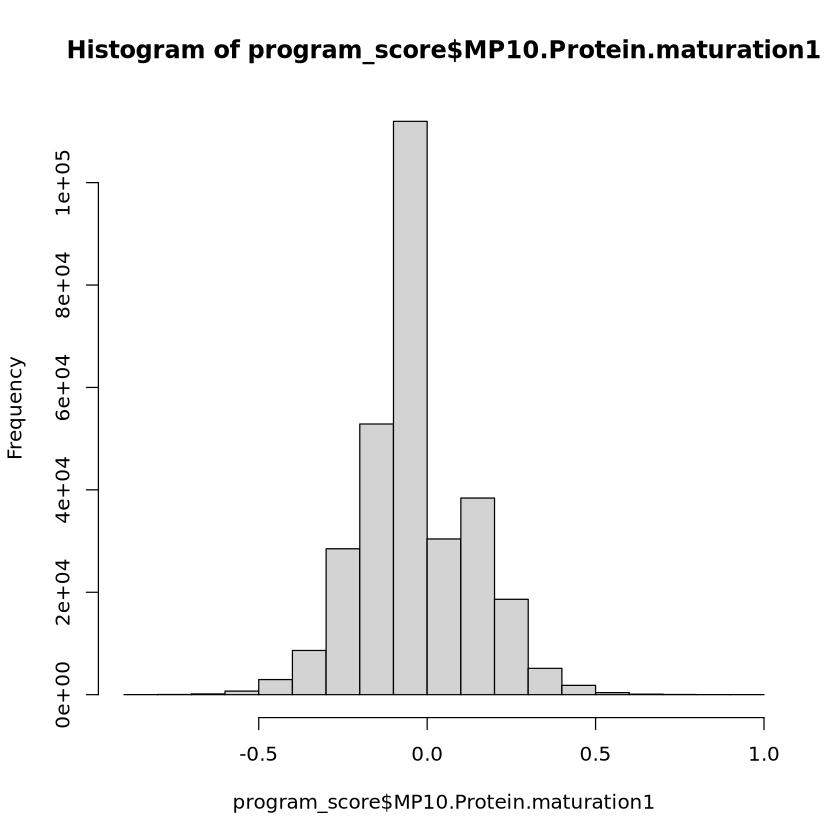

In [60]:
hist(program_score$MP10.Protein.maturation1)

In [61]:
summary(program_score)

 MP31.Alveolar1      MP1..Cell.Cycle...G2.M1  MP5.Stress1      
 Min.   :-1.089189   Min.   :-0.775598       Min.   :-0.65398  
 1st Qu.:-0.091931   1st Qu.:-0.071932       1st Qu.:-0.07594  
 Median : 0.000000   Median : 0.000000       Median : 0.00000  
 Mean   : 0.001738   Mean   : 0.002086       Mean   : 0.01241  
 3rd Qu.: 0.100222   3rd Qu.: 0.069935       3rd Qu.: 0.09704  
 Max.   : 1.137921   Max.   : 0.854837       Max.   : 0.75677  
  MP6.Hypoxia1      MP2..Cell.Cycle...G1.S1  MP12.EMT.I1       
 Min.   :-1.10404   Min.   :-2.28612        Min.   :-0.607482  
 1st Qu.:-0.14293   1st Qu.: 0.00000        1st Qu.:-0.069285  
 Median : 0.00000   Median : 0.00000        Median : 0.000000  
 Mean   :-0.01095   Mean   : 0.03644        Mean   : 0.002377  
 3rd Qu.: 0.11017   3rd Qu.: 0.18578        3rd Qu.: 0.072778  
 Max.   : 1.10404   Max.   : 1.87622        Max.   : 0.683332  
 MP18.Interferon.MHC.II..II.1  MP13.EMT.II1      MP14.EMT.III1     
 Min.   :-0.95461             Min.  

In [65]:
all_vars = round(sapply(program_score, var),2)
all_vars

MP31.Alveolar1      MP1..Cell.Cycle...G2.M1 
                        0.03                         0.02 
                 MP5.Stress1                 MP6.Hypoxia1 
                        0.02                         0.04 
     MP2..Cell.Cycle...G1.S1                  MP12.EMT.I1 
                        0.10                         0.01 
MP18.Interferon.MHC.II..II.1                 MP13.EMT.II1 
                        0.04                         0.01 
               MP14.EMT.III1     MP10.Protein.maturation1 
                        0.03                         0.03 
MP8.Proteasomal.degradation1  MP19.Epithelial.Senescence1 
                        0.10                         0.03 
   MP3..Cell.Cylce.HMG.rich1            MP23.Secreted.II1 
                        0.03                         0.01 
        MP30.PDAC.classical1 
                        0.01

## Get adjacency matrix

In [5]:
epi_seurat = readRDS('../data/epi_seurat.RDS')
program_score = epi_seurat@meta.data[,14:28]
weighted_adjmtx = uwot::umap(program_score, min_dist=0.3, spread=1, ret_extra='fgraph', fast_sgd=TRUE)

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’



In [19]:
str(weighted_adjmtx)

List of 2
 $ embedding: num [1:300733, 1:2] -5.907 -0.573 1.821 5.998 1.354 ...
  ..- attr(*, "scaled:center")= num [1:2] -0.119 0.101
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:300733] "Cell_1" "Cell_2" "Cell_3" "Cell_4" ...
  .. ..$ : NULL
 $ fgraph   :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. ..@ i       : int [1:6509784] 11189 22750 28398 52867 63239 138668 165288 199033 202900 220540 ...
  .. ..@ p       : int [1:300734] 0 14 32 56 71 86 103 127 146 169 ...
  .. ..@ Dim     : int [1:2] 300733 300733
  .. ..@ Dimnames:List of 2
  .. .. ..$ : NULL
  .. .. ..$ : NULL
  .. ..@ x       : num [1:6509784] 0.217 0.261 0.194 0.276 0.208 ...
  .. ..@ factors : list()


In [6]:
source('../src/cluster_utils.R')
leiden_clusters = do_leiden_one(weighted_adjmtx$fgraph, resolution=0.4, n_starts=1)

In [7]:
plot_umap <- function(umap, size=1, title='UMAP'){
   ggplot(umap, aes(x=X,y=Y, color=cluster)) +
    geom_point(size=size)+
    theme_bw() +
    guides(color=guide_legend(override.aes=list(size=5))) +
    ggtitle(title) +
    NULL
}


In [8]:
umap_data = as.data.frame(weighted_adjmtx$embedding)
colnames(umap_data) = c('X','Y')
umap_data$cluster = leiden_clusters

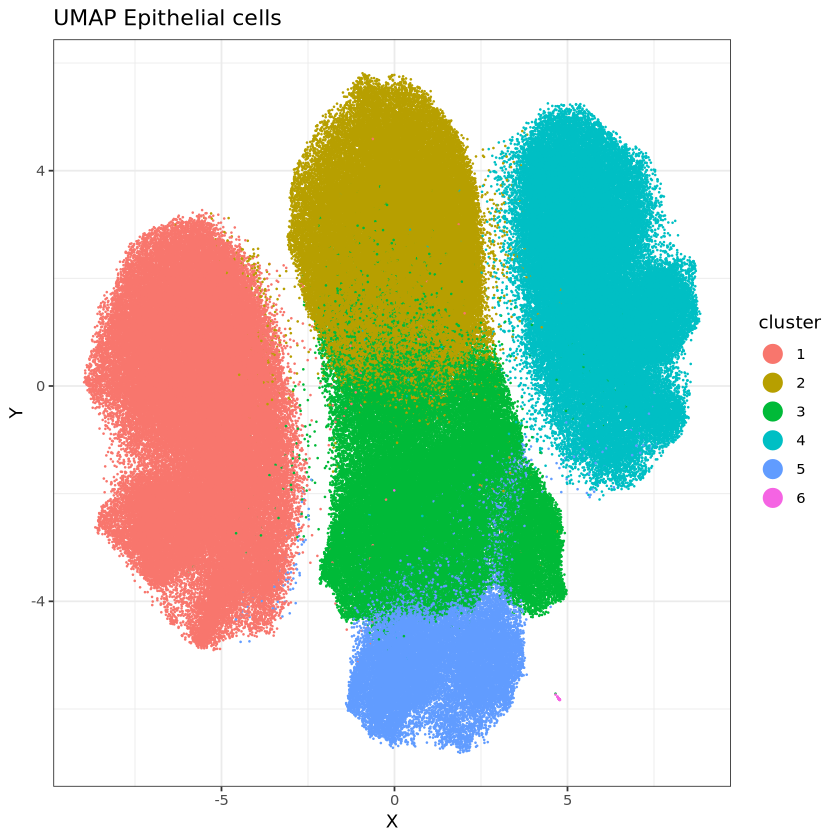

In [9]:
plot_umap(umap_data,size=0.1,title='UMAP Epithelial cells')

In [26]:
# Get cluster gene marker
markers <- findMarkers(t(program_score), groups=leiden_clusters, test.type='wilcox',pval.type='all')

In [121]:
#saveRDS(markers,'../outputs/epi_subtypes.RDS')

In [27]:
as.data.frame(markers@listData$'5')

p.value      FDR          summary.AUC AUC.1      
MP8.Proteasomal.degradation1 2.921072e-19 4.381609e-18 0.001222806 0.041783027
MP1..Cell.Cycle...G2.M1      1.325289e-05 7.946483e-05 0.257834820 0.166806736
MP14.EMT.III1                1.589297e-05 7.946483e-05 0.260056034 0.226903266
MP3..Cell.Cylce.HMG.rich1    4.744664e-05 1.779249e-04 0.273847562 0.086235227
MP23.Secreted.II1            9.989875e-04 2.996962e-03 0.682952589 0.669721907
MP31.Alveolar1               6.753452e-03 1.688363e-02 0.349406240 0.350997585
MP6.Hypoxia1                 1.432570e-02 3.069792e-02 0.636151804 0.603987317
MP18.Interferon.MHC.II..II.1 8.896216e-02 1.668041e-01 0.594561766 0.249746891
MP30.PDAC.classical1         1.346317e-01 2.243862e-01 0.583175198 0.493400169
MP19.Epithelial.Senescence1  1.759670e-01 2.639505e-01 0.575235902 0.433055281
MP10.Protein.maturation1     2.980977e-01 4.064969e-01 0.442151683 0.488972087
MP12.EMT.I1                  3.840837e-01 4.801047e-01 0.451609730 0.454736119
MP5.Stress1                  6.103730e-01 7.042766e-01 0.471671390 0.445005530
MP13.EMT.II1                 7.654311e-01 8.201047e-01 0.500663184 0.490981690
MP2..Cell.Cycle...G1.S1      9.971762e-01 9.971762e-01 0.500197568 0.001158066
                             AUC.2        AUC.3       AUC.4      AUC.6      
MP8.Proteasomal.degradation1 7.159291e-07 0.004166814 0.05587863 0.001222806
MP1..Cell.Cycle...G2.M1      2.847362e-01 0.338608655 0.35573406 0.257834820
MP14.EMT.III1                1.508603e-01 0.307900684 0.21322320 0.260056034
MP3..Cell.Cylce.HMG.rich1    2.771803e-01 0.345198810 0.35134881 0.273847562
MP23.Secreted.II1            6.822585e-01 0.624210933 0.64012977 0.682952589
MP31.Alveolar1               2.543894e-01 0.409341161 0.34852749 0.349406240
MP6.Hypoxia1                 6.369005e-01 0.592983944 0.78715253 0.636151804
MP18.Interferon.MHC.II..II.1 1.811688e-01 0.335875905 0.26746854 0.594561766
MP30.PDAC.classical1         5.054697e-01 0.503336292 0.63942955 0.583175198
MP19.Epithelial.Senescence1  3.952485e-01 0.503894834 0.55363992 0.575235902
MP10.Protein.maturation1     4.675178e-01 0.518018905 0.60759135 0.442151683
MP12.EMT.I1                  4.717504e-01 0.471232532 0.48109289 0.451609730
MP5.Stress1                  3.933861e-01 0.445406696 0.49609725 0.471671390
MP13.EMT.II1                 4.874188e-01 0.500663184 0.49806624 0.553148969
MP2..Cell.Cycle...G1.S1      5.007186e-01 0.499867331 0.99873284 0.500197568

In [28]:
mark = c()
for (n in names(markers@listData)){
    mark <- cbind(mark,rownames(markers@listData[[n]][1:5,]))
}
mark = as.data.frame(t(mark))
rownames(mark) <- paste('cluster ',1:6)

In [29]:
mark

V1                           V2                          
cluster  1 MP2..Cell.Cycle...G1.S1      MP18.Interferon.MHC.II..II.1
cluster  2 MP8.Proteasomal.degradation1 MP18.Interferon.MHC.II..II.1
cluster  3 MP18.Interferon.MHC.II..II.1 MP8.Proteasomal.degradation1
cluster  4 MP2..Cell.Cycle...G1.S1      MP18.Interferon.MHC.II..II.1
cluster  5 MP8.Proteasomal.degradation1 MP1..Cell.Cycle...G2.M1     
cluster  6 MP8.Proteasomal.degradation1 MP18.Interferon.MHC.II..II.1
           V3                          V4                          
cluster  1 MP3..Cell.Cylce.HMG.rich1   MP8.Proteasomal.degradation1
cluster  2 MP14.EMT.III1               MP19.Epithelial.Senescence1 
cluster  3 MP19.Epithelial.Senescence1 MP10.Protein.maturation1    
cluster  4 MP6.Hypoxia1                MP8.Proteasomal.degradation1
cluster  5 MP14.EMT.III1               MP3..Cell.Cylce.HMG.rich1   
cluster  6 MP30.PDAC.classical1        MP13.EMT.II1                
           V5                         
cluster  1 MP1..Cell.Cycle...G2.M1    
cluster  2 MP31.Alveolar1             
cluster  3 MP30.PDAC.classical1       
cluster  4 MP10.Protein.maturation1   
cluster  5 MP23.Secreted.II1          
cluster  6 MP19.Epithelial.Senescence1

## What if I do gene expression directly?

In [10]:
epi_idx = which(dmt1$pts$type_lvl1=='Epithelial')
epi_counts = dmt1$counts[,epi_idx]
epi_meta = dmt1$pts[epi_idx,]
umap_gene = uwot::umap(as.matrix(t(epi_counts)), min_dist=0.3, n_components=2, ret_extra='fgraph', fast_sgd=TRUE)

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.1 GiB”
Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’



In [227]:
meta = dmt1$pts[epi_idx, ]
counts = dmt1$counts[,epi_idx]
rownames(counts) = gene_ls
meta$counts = colSums(counts)
epi_seurat <- CreateSeuratObject(counts=counts, meta.data=meta)
epi_seurat <- NormalizeData(epi_seurat, normalization.method='LogNormalize', 
                              scale.factor = median(colSums(counts)))

epi_seurat <- FindVariableFeatures(epi_seurat)
epi_seurat <- ScaleData(epi_seurat)

Warning message:
“Data is of class dgTMatrix. Coercing to dgCMatrix.”
Normalizing layer: counts

Finding variable features for layer counts

Centering and scaling data matrix



In [228]:
epi_seurat <- RunPCA(epi_seurat, npcs=10)

PC_ 1 
Positive:  CD74, COL3A1, C1QC, LYZ, VIM, C1QA, CD163, HMGB2, C1QB, HLA-DRA 
	   TOP2A, COL4A1, MKI67, CXCL9, IL32, MRC1, ARHGDIB, ACTA2, HCK, PCNA 
	   CD4, SFRP2, PECAM1, PRDM1, CSF1R, PTTG1, IL7R, CCL5, RARRES3, EPHA2 
Negative:  EGR1, CX3CL1, VEGFA, EREG, DUSP6, MET, TNFRSF1A, KRT8, RNF43, JUN 
	   EFNB2, TNFRSF25, IGFBP3, PLTP, FN1, IER2, CD274, SMARCA4, BCL6, OSMR 
	   INHBA, JAG2, NOTCH2, LY6E, PTGES2, SPRY4, RANBP1, SOX4, STING1, MX1 
PC_ 2 
Positive:  LCN2, IGFBP3, SPP1, SERPINA1, PLTP, SOX4, CD74, HLA-C, BCL6, TGFB1 
	   S100A9, JUN, NOTCH2, HLA-E, KDR, HLA-DRA, ICAM1, SLC40A1, APOE, FOS 
	   JUNB, LY6E, ZBTB16, HLA-DRB1, ALOX15B, CXCL8, IL26, EPHA2, BMPR2, CD40 
Negative:  MKI67, EREG, CCND1, ANXA1, HMGB2, TOP2A, CDCA7, PCNA, DUSP6, HIF1A 
	   VEGFC, ETV4, VEGFA, SMARCA4, DNAJB1, CKB, CD274, INHBA, PTTG1, UBE2C 
	   CXCL9, IL18, COL3A1, ARHGDIB, ETV5, RANBP1, CX3CL1, KRT8, MMP9, MLEC 
PC_ 3 
Positive:  CX3CL1, ZBTB16, COL3A1, VEGFA, CD163, KRT8, BIRC3, FOS, TNFRSF25, I

In [230]:
epi_seurat <- FindNeighbors(epi_seurat, dims = 1:10)
epi_seurat <- FindClusters(epi_seurat, resolution = 0.5)


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 300733
Number of edges: 5034842

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7398
Number of communities: 5
Elapsed time: 216 seconds


In [231]:
epi_seurat <- RunUMAP(epi_seurat, dims=1:10)

14:22:44 UMAP embedding parameters a = 0.9922 b = 1.112

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

14:22:44 Read 300733 rows and found 10 numeric columns

14:22:44 Using Annoy for neighbor search, n_neighbors = 30

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

14:22:44 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

14:23:36 Writing NN index file to temp file /local/scratch/42728092.1.interactive/RtmpmXwtOV/file60bc7ba4969

14:23:36 Searching Annoy index using 1 thread, search_k = 3000

14:27:15 Annoy recall = 100%

14:27:16 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

14:27:38 Initiali

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



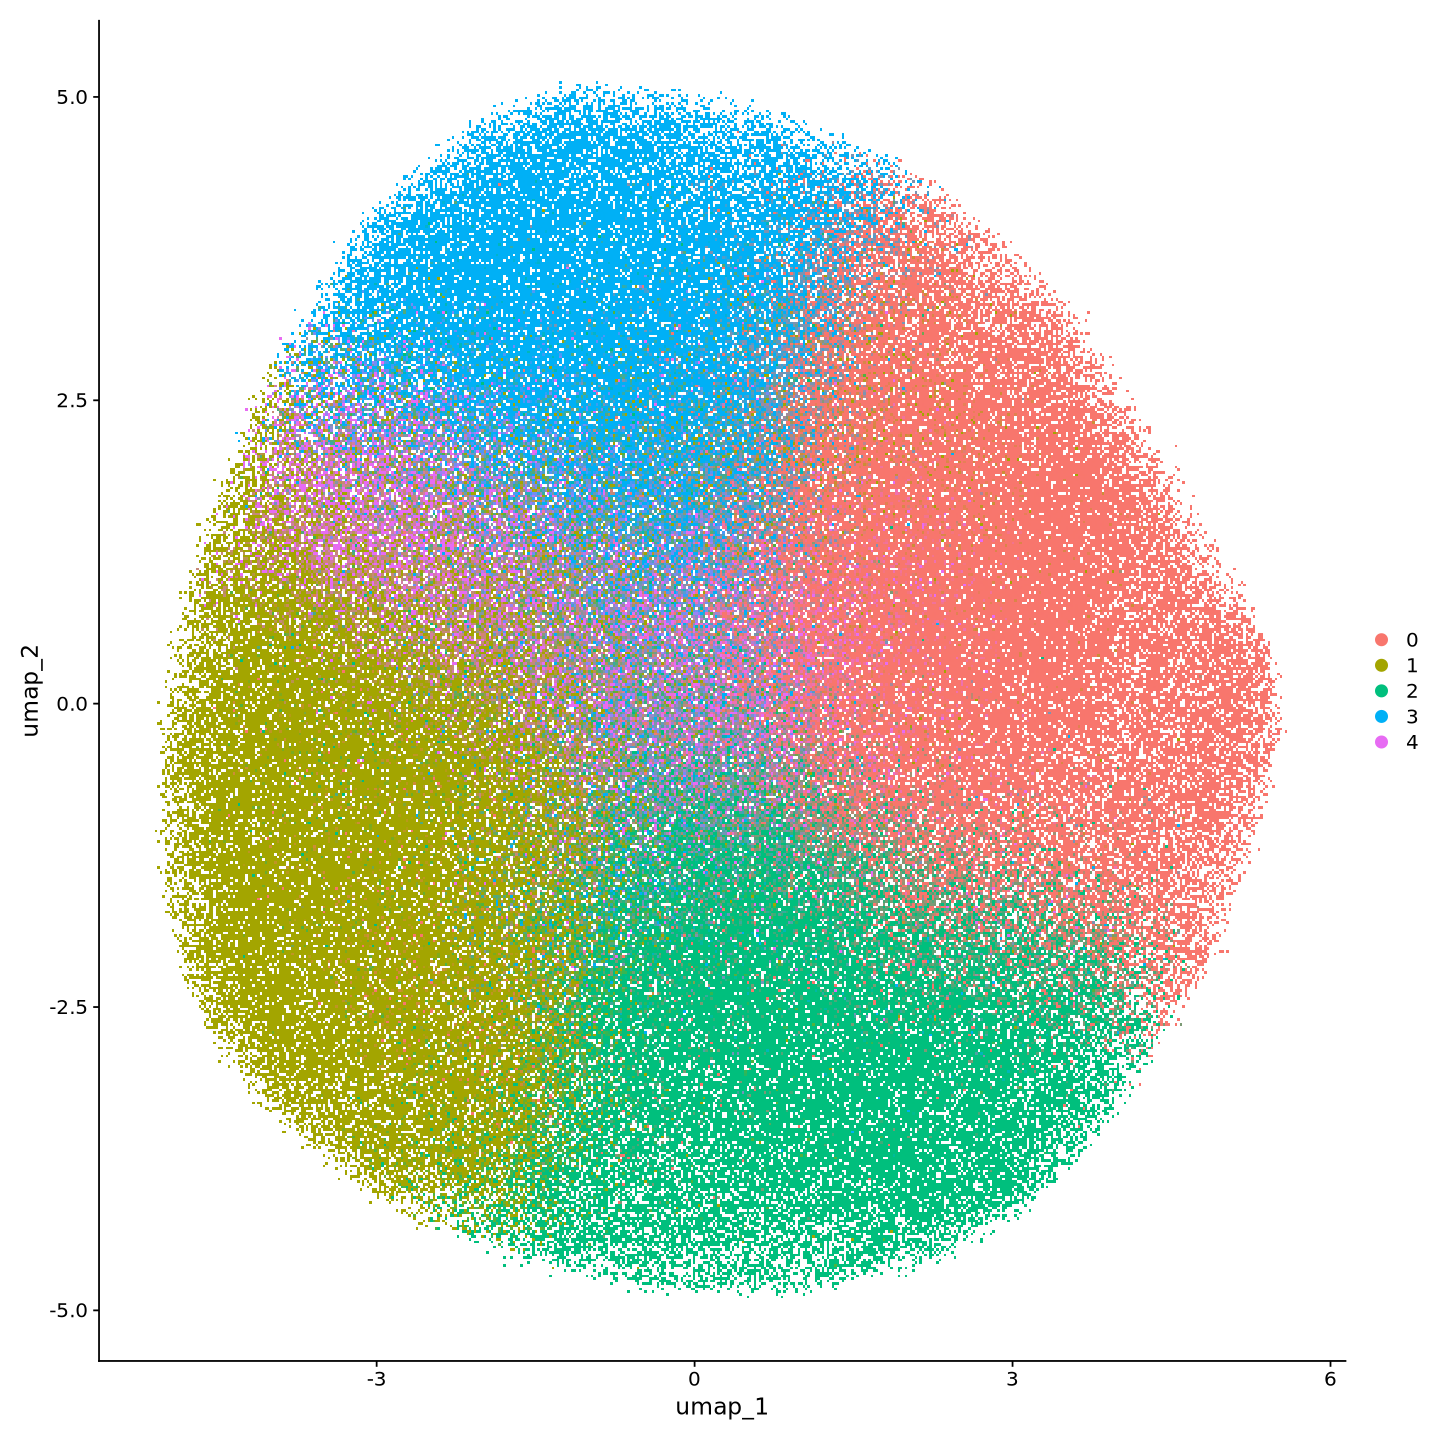

In [232]:
DimPlot(epi_seurat, reduction='umap')

In [244]:
gene_markers <- c()

for (i in 0:4){
    cluster_marker = FindMarkers(epi_seurat, ident.1 = i)
    gene_markers <- rbind(gene_markers,
            rownames(cluster_marker[order(cluster_marker$avg_log2FC, decreasing=TRUE), ])[1:10])
}

gene_markers <- as.data.frame(gene_markers)
rownames(gene_markers) <- paste('cluster ', 0:4)                          

In [245]:
gene_markers

V1     V2    V3    V4       V5     V6    V7     V8      V9   
cluster  0 CXCL9  C1QC  C1QA  RARRES3  LYZ    C1QB  CD4    SFRP2   SEPP1
cluster  1 CX3CL1 VEGFA SPRY4 TNFRSF25 EGR1   FN1   RANBP1 TGFBI   INHBA
cluster  2 UBE2C  PTTG1 MKI67 TOP2A    HMGB2  VEGFC PCNA   CDCA7   UBE2S
cluster  3 IGFBP3 LCN2  SPP1  CXCL8    S100A9 CXCL6 PLTP   IL1B    CXCL1
cluster  4 KDR    SOX4  EPHA4 BCL6     FSCN1  PERP  BMP5   TSPAN13 CHGB 
           V10    
cluster  0 PRDM1  
cluster  1 MX1    
cluster  2 NT5E   
cluster  3 ALOX15B
cluster  4 HEY1

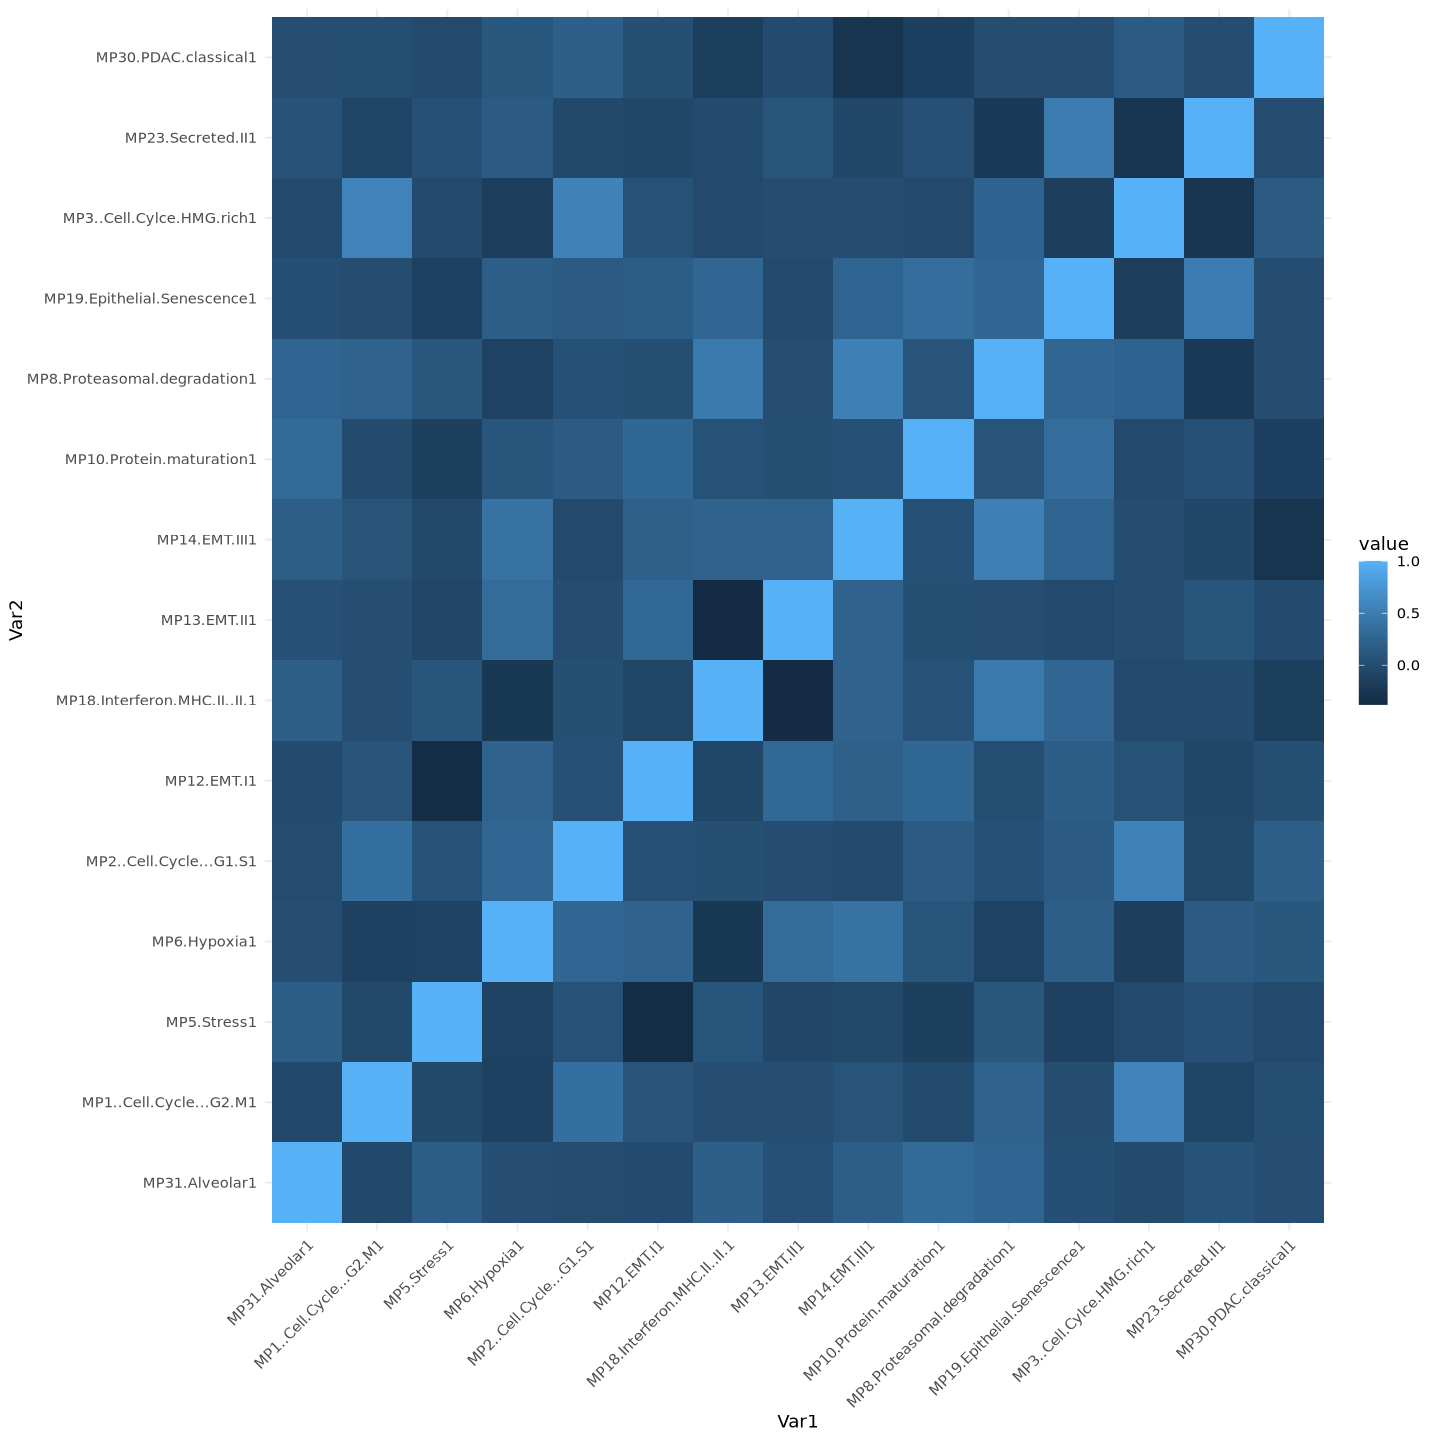

In [284]:
# How correlated are the program scores?
cor_matrix = cor(program_score)
cor_matrix_melted <- reshape2::melt(cor_matrix)
fig.size(12,12)
ggplot(data = cor_matrix_melted, aes(x = Var1, y = Var2, fill = value)) +
    geom_tile() +
    theme_minimal() +
    scale_fill_gradient() +
    theme(axis.text.x=element_text(angle=45, hjust=1)) +
    NULL

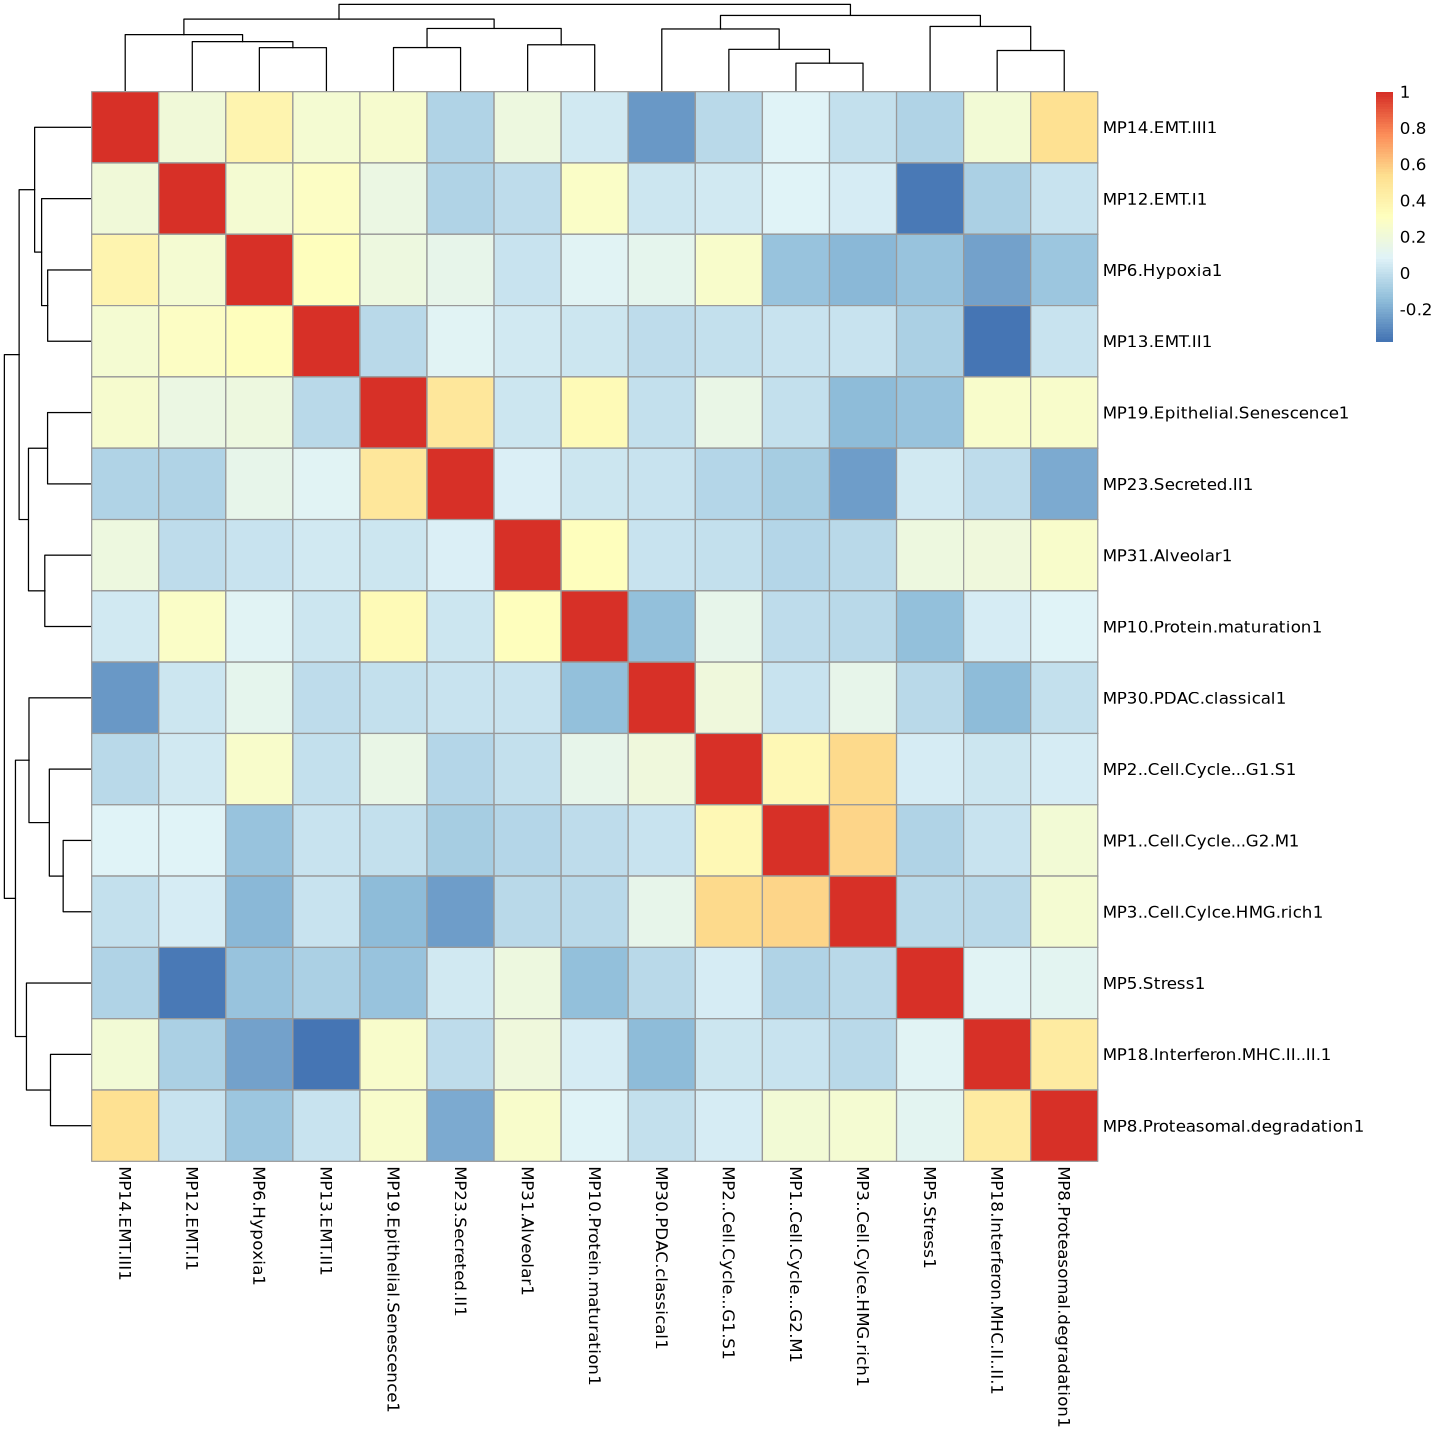

In [287]:
library(pheatmap)
pheatmap(cor_matrix, legend=TRUE)

## DE on gene-level after clustering using the programs

In [ ]:
create_contrast <- function(c, total=14){
    arr = rep(-1/(total-1), times = total)
    arr[c] = 1
    return(arr)
}

epi_raw_counts = dmt1$counts[, epi_idx]
# Pseudo count to avoid log(0)
epi_raw_counts = epi_raw_counts + 1
meta$leiden = leiden_clusters
dds <- DESeqDataSetFromMatrix(countData=epi_raw_counts, colData=meta, design= ~ 0 + leiden)
dds <- DESeq(dds)

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.1 GiB”
converting counts to integer mode

estimating size factors

estimating dispersions

gene-wise dispersion estimates



In [291]:
res = c()
top10_result = c()
clusters = as.character(seq(1:14))
for (i in 1:length(clusters)){
  print(i, clusters[i])
  deseq2results <- results(dds, contrast=create_contrast(i, length(clusters)))
  deseq2results$cluster <- i - 1
  top_ten = deseq2results[order(deseq2results$log2FoldChange, decreasing=TRUE),][1:10,]
  res <- rbind(res, top_ten)
}


In [303]:
min(rowSums(epi_raw_counts))

[1] 353

# Colocalization with the new epi subtypes

In [ ]:
epi_idx = which(dmt1$pts$type_lvl1=='Epithelial')
epi_counts = dmt1$counts[,epi_idx]
epi_meta = dmt1$pts[epi_idx,]

In [37]:
epi_meta$type_lvl2 <- paste('Epi', leiden_clusters, sep='')

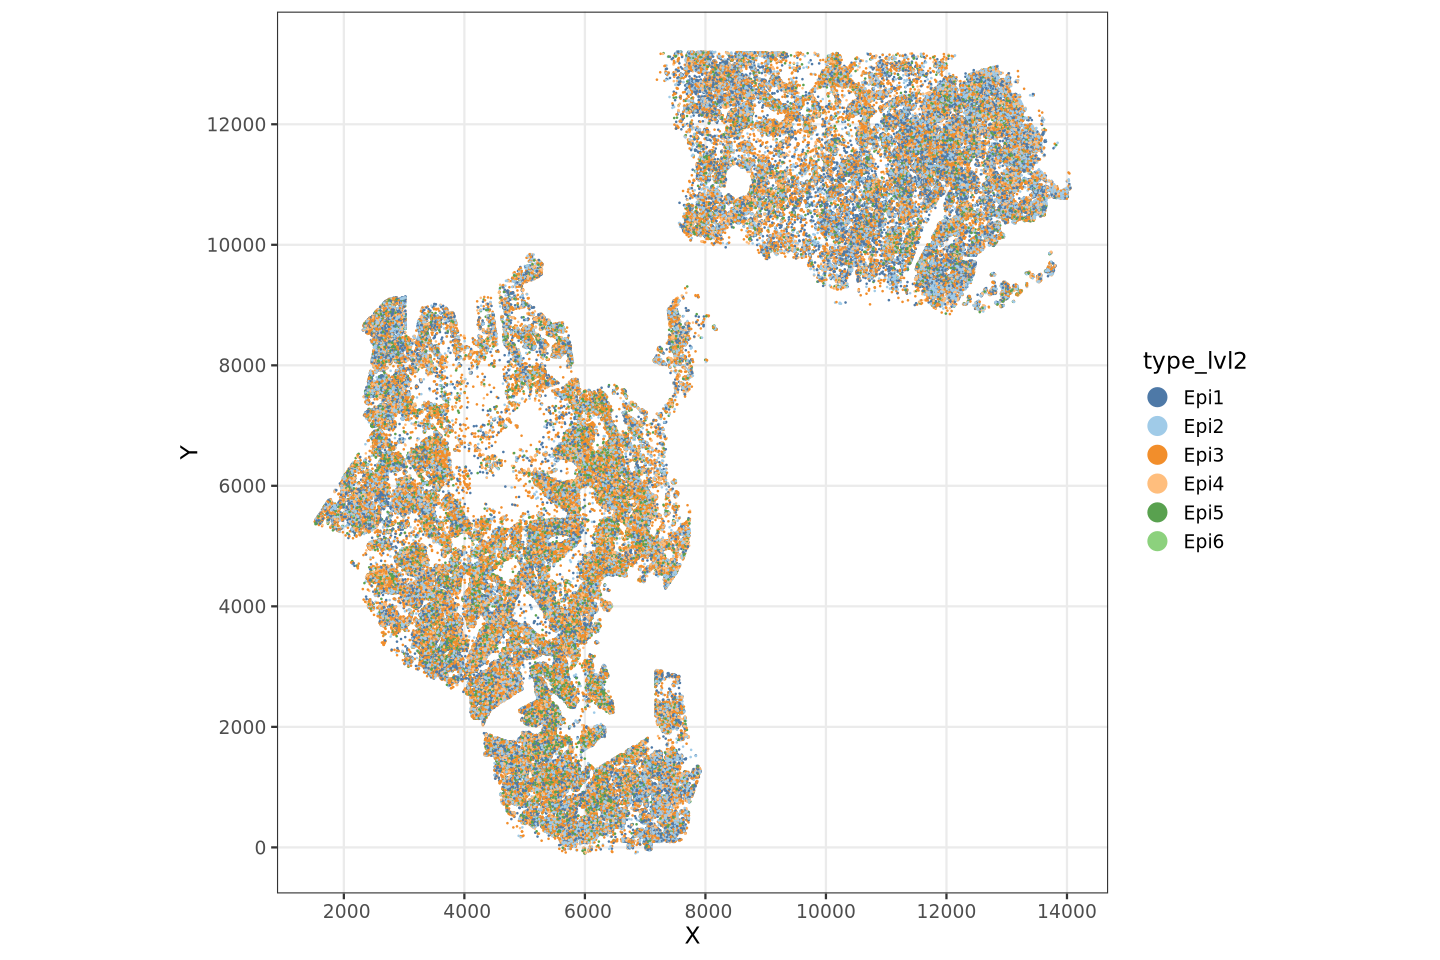

In [39]:
# Where are each subtype of epithelial?
plot_cell <- function(plot_data){
    
    ggplot() +
        geom_point(data=plot_data, aes(X, Y, color=type_lvl2),  size=0.1) +
        theme_bw(base_size=14) +
        coord_sf() +
        scale_color_tableau('Tableau 20') +
        guides(color=guide_legend(override.aes=list(size=5))) + # Increase marker size
        NULL
}
plot_cell(epi_meta)

In [ ]:
library(RANN)
coords = dmt1$pts[, c('X','Y')]
nearest_neigh <- nn2(coords, k=10)
#head(nearest_neigh$nn.idx[indx_spp1_mac,])

find_type <- function(row, types){
    return(types[row])
}
neighbors_true <- sapply(nearest_neigh$nn.idx[indx_spp1_mac,], find_type, types = dmt1$pts$type_lvl2)
neighbors_null <- sapply(nearest_neigh$nn.idx[indx_spp1_mac,], find_type, types = sample(dmt1$pts$type_lvl2))


In [11]:
# Merge new epi subtypes with the original data
epi_subtypes = epi_meta[,c('ORIG_ID', 'type_lvl2', 'hubType')]
merge_df = merge(dmt1$pts, epi_subtypes, by='ORIG_ID', all=TRUE)
# Replace column type_lvl2 where available
merge_df$type_lvl2.x = ifelse(!is.na(merge_df$type_lvl2.y), merge_df$type_lvl2.y, merge_df$type_lvl2.x)
merge_df = select(merge_df, -type_lvl2.y)
#colnames(merge_df) <- c('ORIG_ID','X','Y','type_lvl1','type_lvl2','hubID','f','agg_id','spatial_cluster')
head(merge_df)


ERROR: Error: column(s) not found: [hubType]


In [81]:
colnames(merge_df) <- c('ORIG_ID','X','Y','type_lvl1','type_lvl2','hubID','f','agg_id','spatial_cluster')

In [88]:
head(nearest_neigh$nn.idx[indx_spp1_mac,])

[,1] [,2]   [,3] [,4]   [,5]   [,6]   [,7]   [,8]   [,9]   [,10] 
[1,]  65      94  99      68 100859     66     64 100854     85 100776
[2,] 155  101251 178  101476    115 101349 101353    156 101070    154
[3,] 277     315 261   22105    292    303    260    298    259    278
[4,] 287     288 286     275    276   9501    274   9306    289    273
[5,] 482     498 513    8253    480    510    449  22412   8048    486
[6,] 583     610 609    7804    532   7712    581    588    637   7807

In [86]:
library(RANN)
coords = merge_df[, c('X','Y')]
nearest_neigh = nn2(coords, k=10)
find_type <- function(row, types){
    return(types[row])
}
neighbors_true <- sapply(nearest_neigh$nn.idx[indx_spp1_mac,], find_type, types = merge_df$type_lvl2)
neighbors_null <- sapply(nearest_neigh$nn.idx[indx_spp1_mac,], find_type, types = sample(merge_df$type_lvl2))


In [89]:
sort(round(table(neighbors_true) / length(neighbors_true) * 100,2) , decreasing=TRUE)

neighbors_true
            SPP1+ Macrophage                   Fibroblast 
                       29.56                         8.92 
                        Epi3            MARCO+ Macrophage 
                        8.25                         7.86 
                        Epi2                         Epi1 
                        6.93                         6.86 
                        Epi4            MERTK+ Macrophage 
                        6.46                         3.83 
                        Epi5       FOLR2+CD14+ Macrophage 
                        3.31                         2.71 
                    Vascular                         Treg 
                        2.14                         1.48 
        FCN1+LYZ+ Macrophage                        CD8 T 
                        1.29                         1.24 
          MMP1+SOX4+ Myeloid NCAM1+ S100B+ SEPP1+ Myeloid 
                        1.24                         1.18 
                      Plasma             

In [90]:
sort(round(table(neighbors_null) / length(neighbors_null) * 100,2) , decreasing=TRUE)

neighbors_null
                        Epi1                   Fibroblast 
                       13.66                        12.96 
                        Epi2                         Epi3 
                       11.20                        10.77 
                        Epi4                     Vascular 
                        9.98                         6.96 
           MARCO+ Macrophage                         Epi5 
                        4.07                         3.63 
           MERTK+ Macrophage             SPP1+ Macrophage 
                        3.49                         3.11 
                        Treg                       Plasma 
                        2.52                         2.31 
                       CD4 T       FOLR2+CD14+ Macrophage 
                        2.16                         2.16 
                       CD8 T                          ILC 
                        1.67                         1.48 
        FCN1+LYZ+ Macrophage           CX

# Plot the environment around SPP1 macrophage

In [107]:
# SPP1 + 10 nearest neighbors
spp1_10nn = nearest_neigh$nn.idx[indx_spp1_mac,]
spp1_10nn_idx = as.numeric(lapply(spp1_env, unique))
spp1_env = dmt1$pts[spp1_10nn_idx,]

In [108]:
head(spp1_env)

X        Y         ORIG_ID type_lvl1 type_lvl2        hubID f        agg_id
1 7088.810  252.2779  67     Myeloid   SPP1+ Macrophage H260  1.209664   4   
2 7087.143  459.4626 162     Myeloid   SPP1+ Macrophage H419  2.664411  14   
3 7102.997  724.9525 291     Myeloid   SPP1+ Macrophage H419  5.129396  21   
4 7106.904  832.8841 301     Myeloid   SPP1+ Macrophage H419  1.767810  24   
5 7118.736 1282.8179 500     Myeloid   SPP1+ Macrophage H419  1.795402 355   
6 7115.490 1448.1396 604     Myeloid   SPP1+ Macrophage H260  1.351512  43   
  spatial_cluster
1 13             
2 0              
3 4              
4 5              
5 0              
6 1

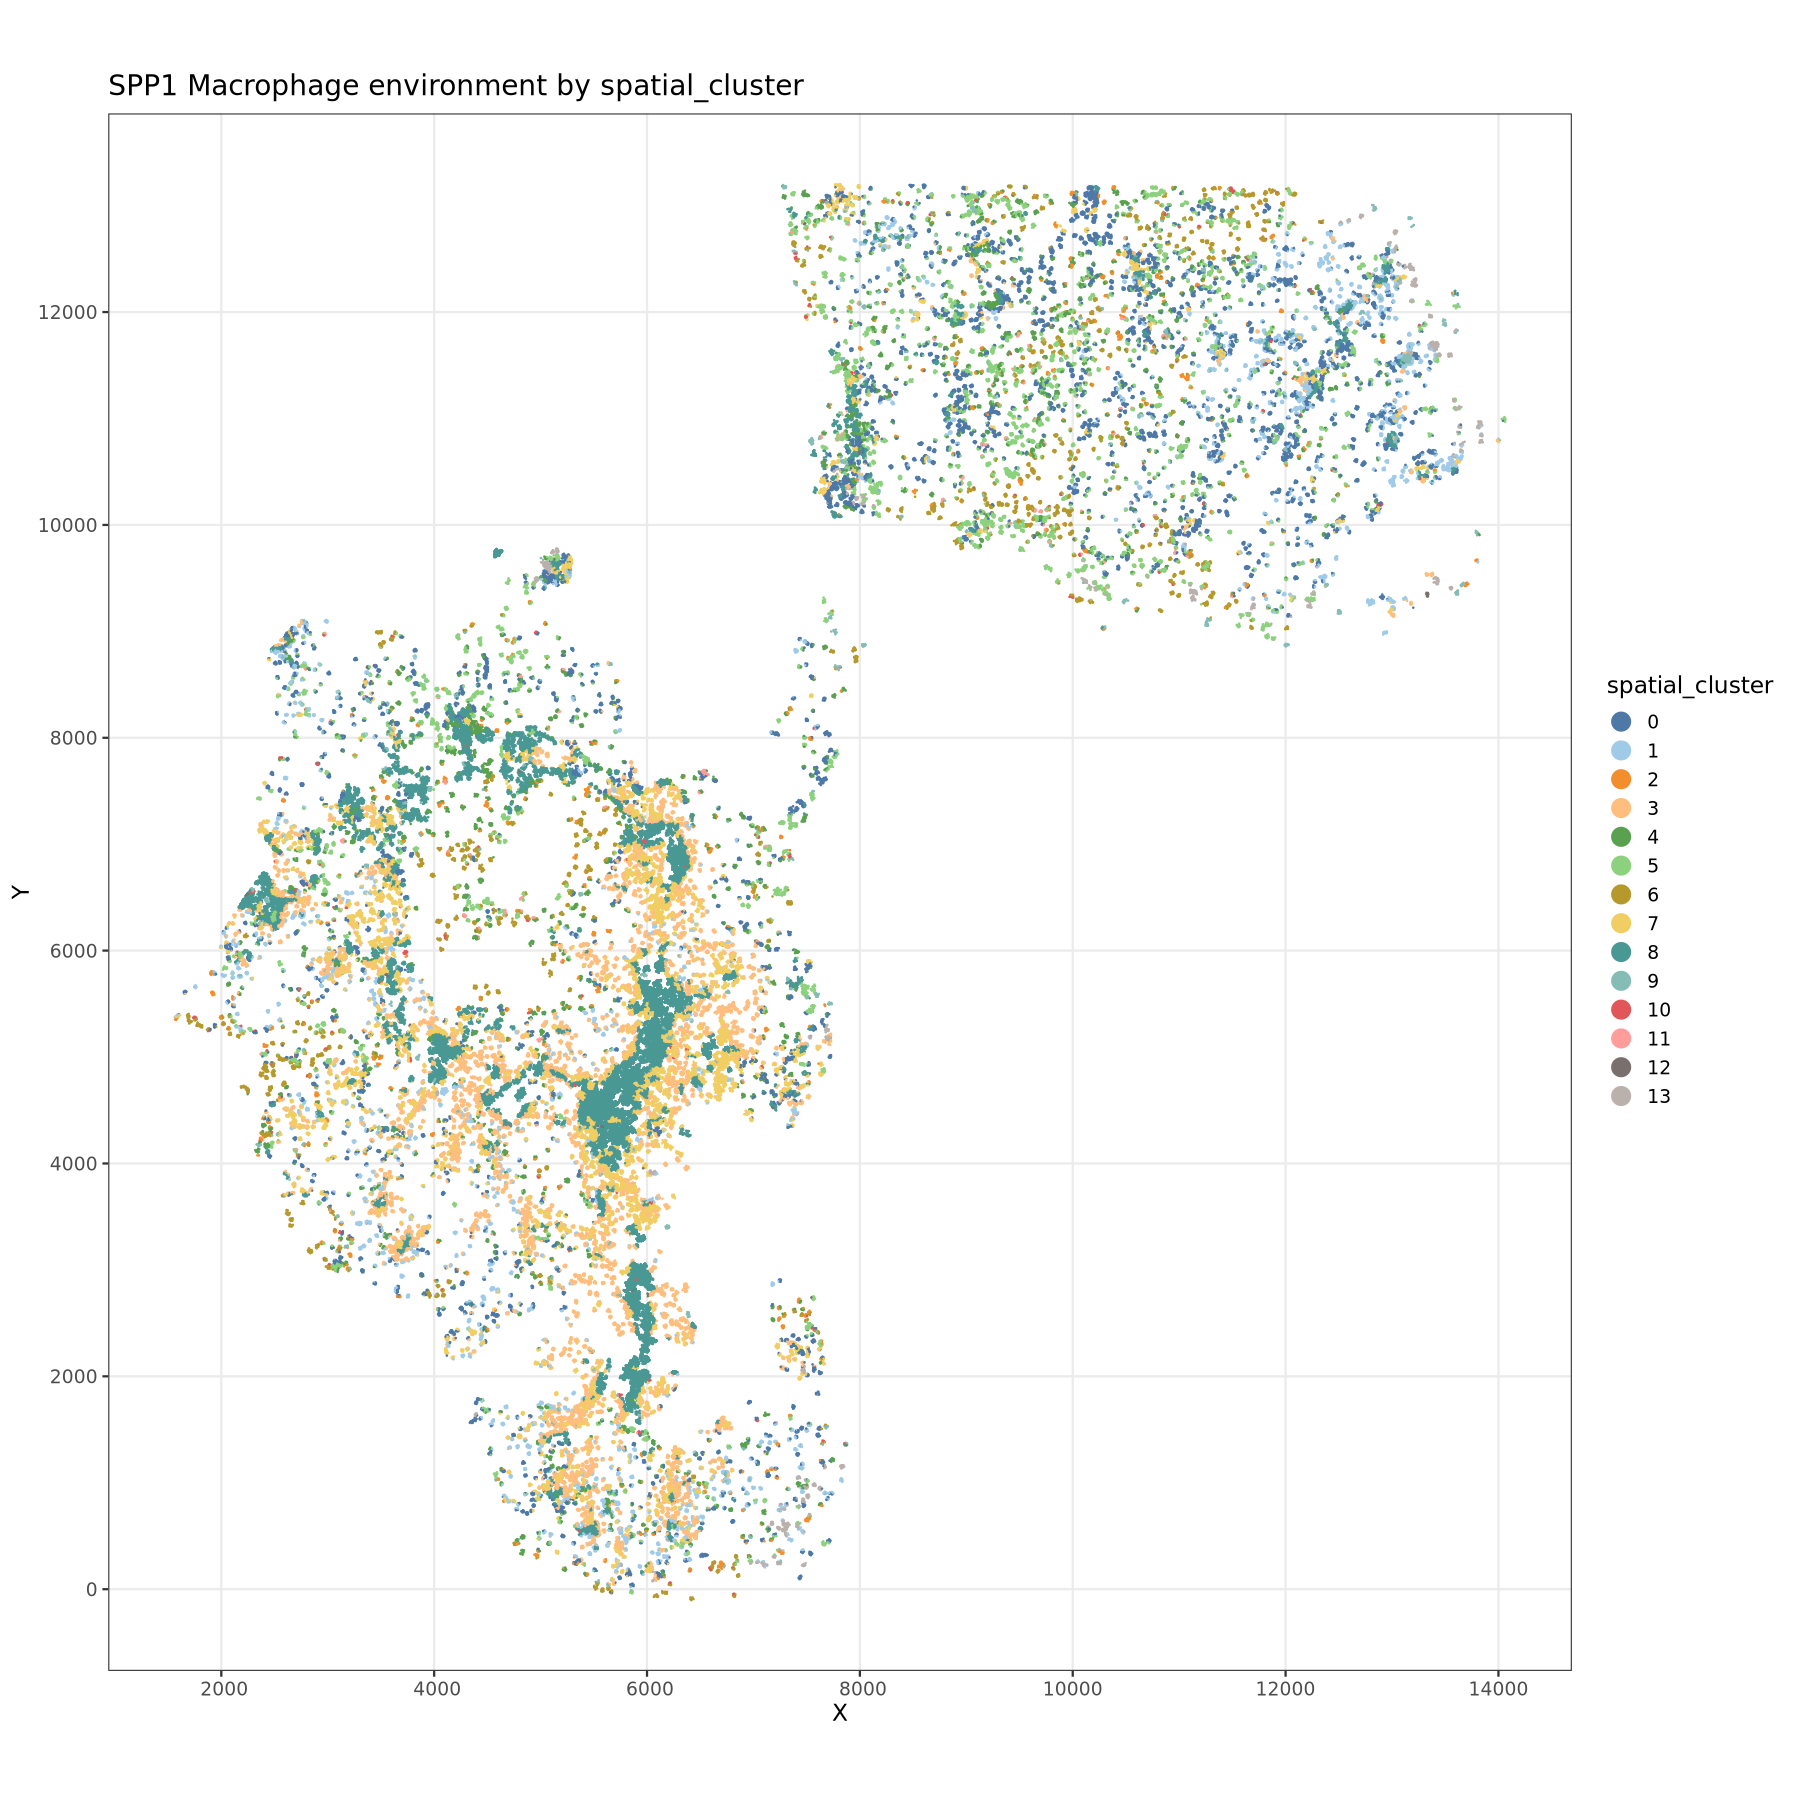

In [115]:
plot_cell <- function(plot_data, title=''){
    
    ggplot() +
        geom_point(data=plot_data, aes(X, Y, color=spatial_cluster),  size=0.1) +
        theme_bw(base_size=14) +
        coord_sf() +
        scale_color_tableau('Tableau 20') +
        guides(color=guide_legend(override.aes=list(size=5))) + # Increase marker size
        ggtitle(title) +
        NULL
}
fig.size(15,15)
plot_cell(spp1_env, "SPP1 Macrophage environment by spatial_cluster")

In [146]:
plot_tile <- function(tile_id, obj, aggs, width=8, height=12, focus='SPP1+ Macrophage',size=7){
    # obj: dataframe with metadata
    
    plt_tiles = aggs$meta_data[tile_id, ][, shape := refocus_bbox(shape)]
    # Get cells in tile
    i_cells = which(obj$agg_id == tile_id)
    fig.size(width, height)
    focused_cell = which(obj$type_lvl2 == focus & obj$agg_id == tile_id)

    ggplot() +
    geom_sf(aes(geometry = st_sfc(shape)), plt_tiles) +
    geom_point(aes(X, Y, color = type_lvl2), fill = NA, obj[i_cells, ], size=size) +
    theme_bw(base_size=14) +
    coord_sf() +
    geom_point(data = obj[focused_cell, ], shape=21, size= size+1, color='black', fill = NA,  aes(X,Y)) +
    geom_point(data = obj[focused_cell, ], shape=21, size= size+2, color='black', fill = NA,  aes(X,Y)) +
    geom_point(data = obj[focused_cell, ], shape=21, size= size+3, color='black', fill = NA,  aes(X,Y)) +

    scale_color_tableau('Tableau 20') +
    labs(color = 'Cell type') +
    ggtitle(paste("Tile: ", tile_id)) +
    NULL

}





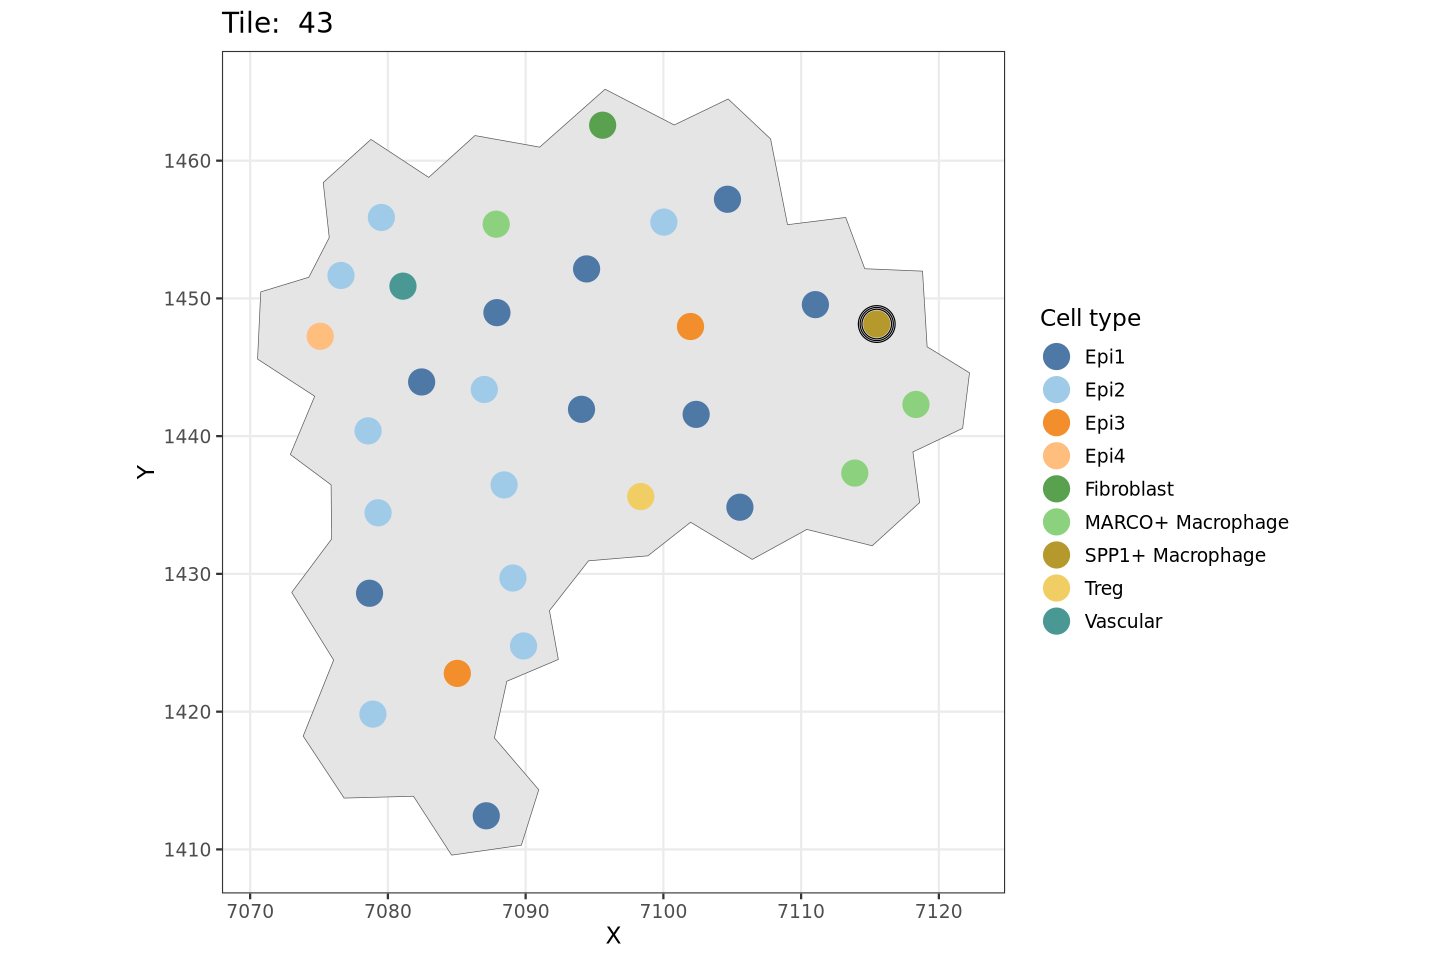

In [147]:
plot_tile(tile_id=43, obj=merge_df, aggs=aggs1)

In [163]:
nearest_neigh100 <- nn2(coords, k=100)
spp1_100nn = nearest_neigh100$nn.idx[indx_spp1_mac,]
spp1_100nn_idx = as.numeric(lapply(spp1_100nn, unique))
spp1_100env = dmt1$pts[spp1_100nn_idx,]

In [181]:

plot_env <- function(obj, aggs, width=8, height=12, focus='SPP1+ Macrophage',size=7){
    # obj: plot_data
    tile_ids = as.numeric(obj$agg_id)
    plt_tiles = aggs$meta_data[tile_ids, ][, shape := refocus_bbox(shape)]
    focused_cell = which(obj$type_lvl2 == focus & obj$agg_id == tile_ids) 
    fig.size(width, height)
    ggplot() +
        geom_sf(aes(geometry = st_sfc(shape)), plt_tiles) +
        geom_point(aes(X, Y, color = type_lvl2), fill = NA, obj, size=size) +
        theme_minimal()+
        geom_point(data = obj[focused_cell, ], shape=21, size= size+1, color='black', fill = NA,  aes(X,Y)) +
        geom_point(data = obj[focused_cell, ], shape=21, size= size+2, color='black', fill = NA,  aes(X,Y)) +
        geom_point(data = obj[focused_cell, ], shape=21, size= size+3, color='black', fill = NA,  aes(X,Y)) +
        scale_color_tableau('Tableau 20') +
        labs(color = 'Cell type') +
        NULL
}

Warning message in check_pal_n(n, max_n):
“This palette can handle a maximum of 20 values.You have supplied 21.”
Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`).”


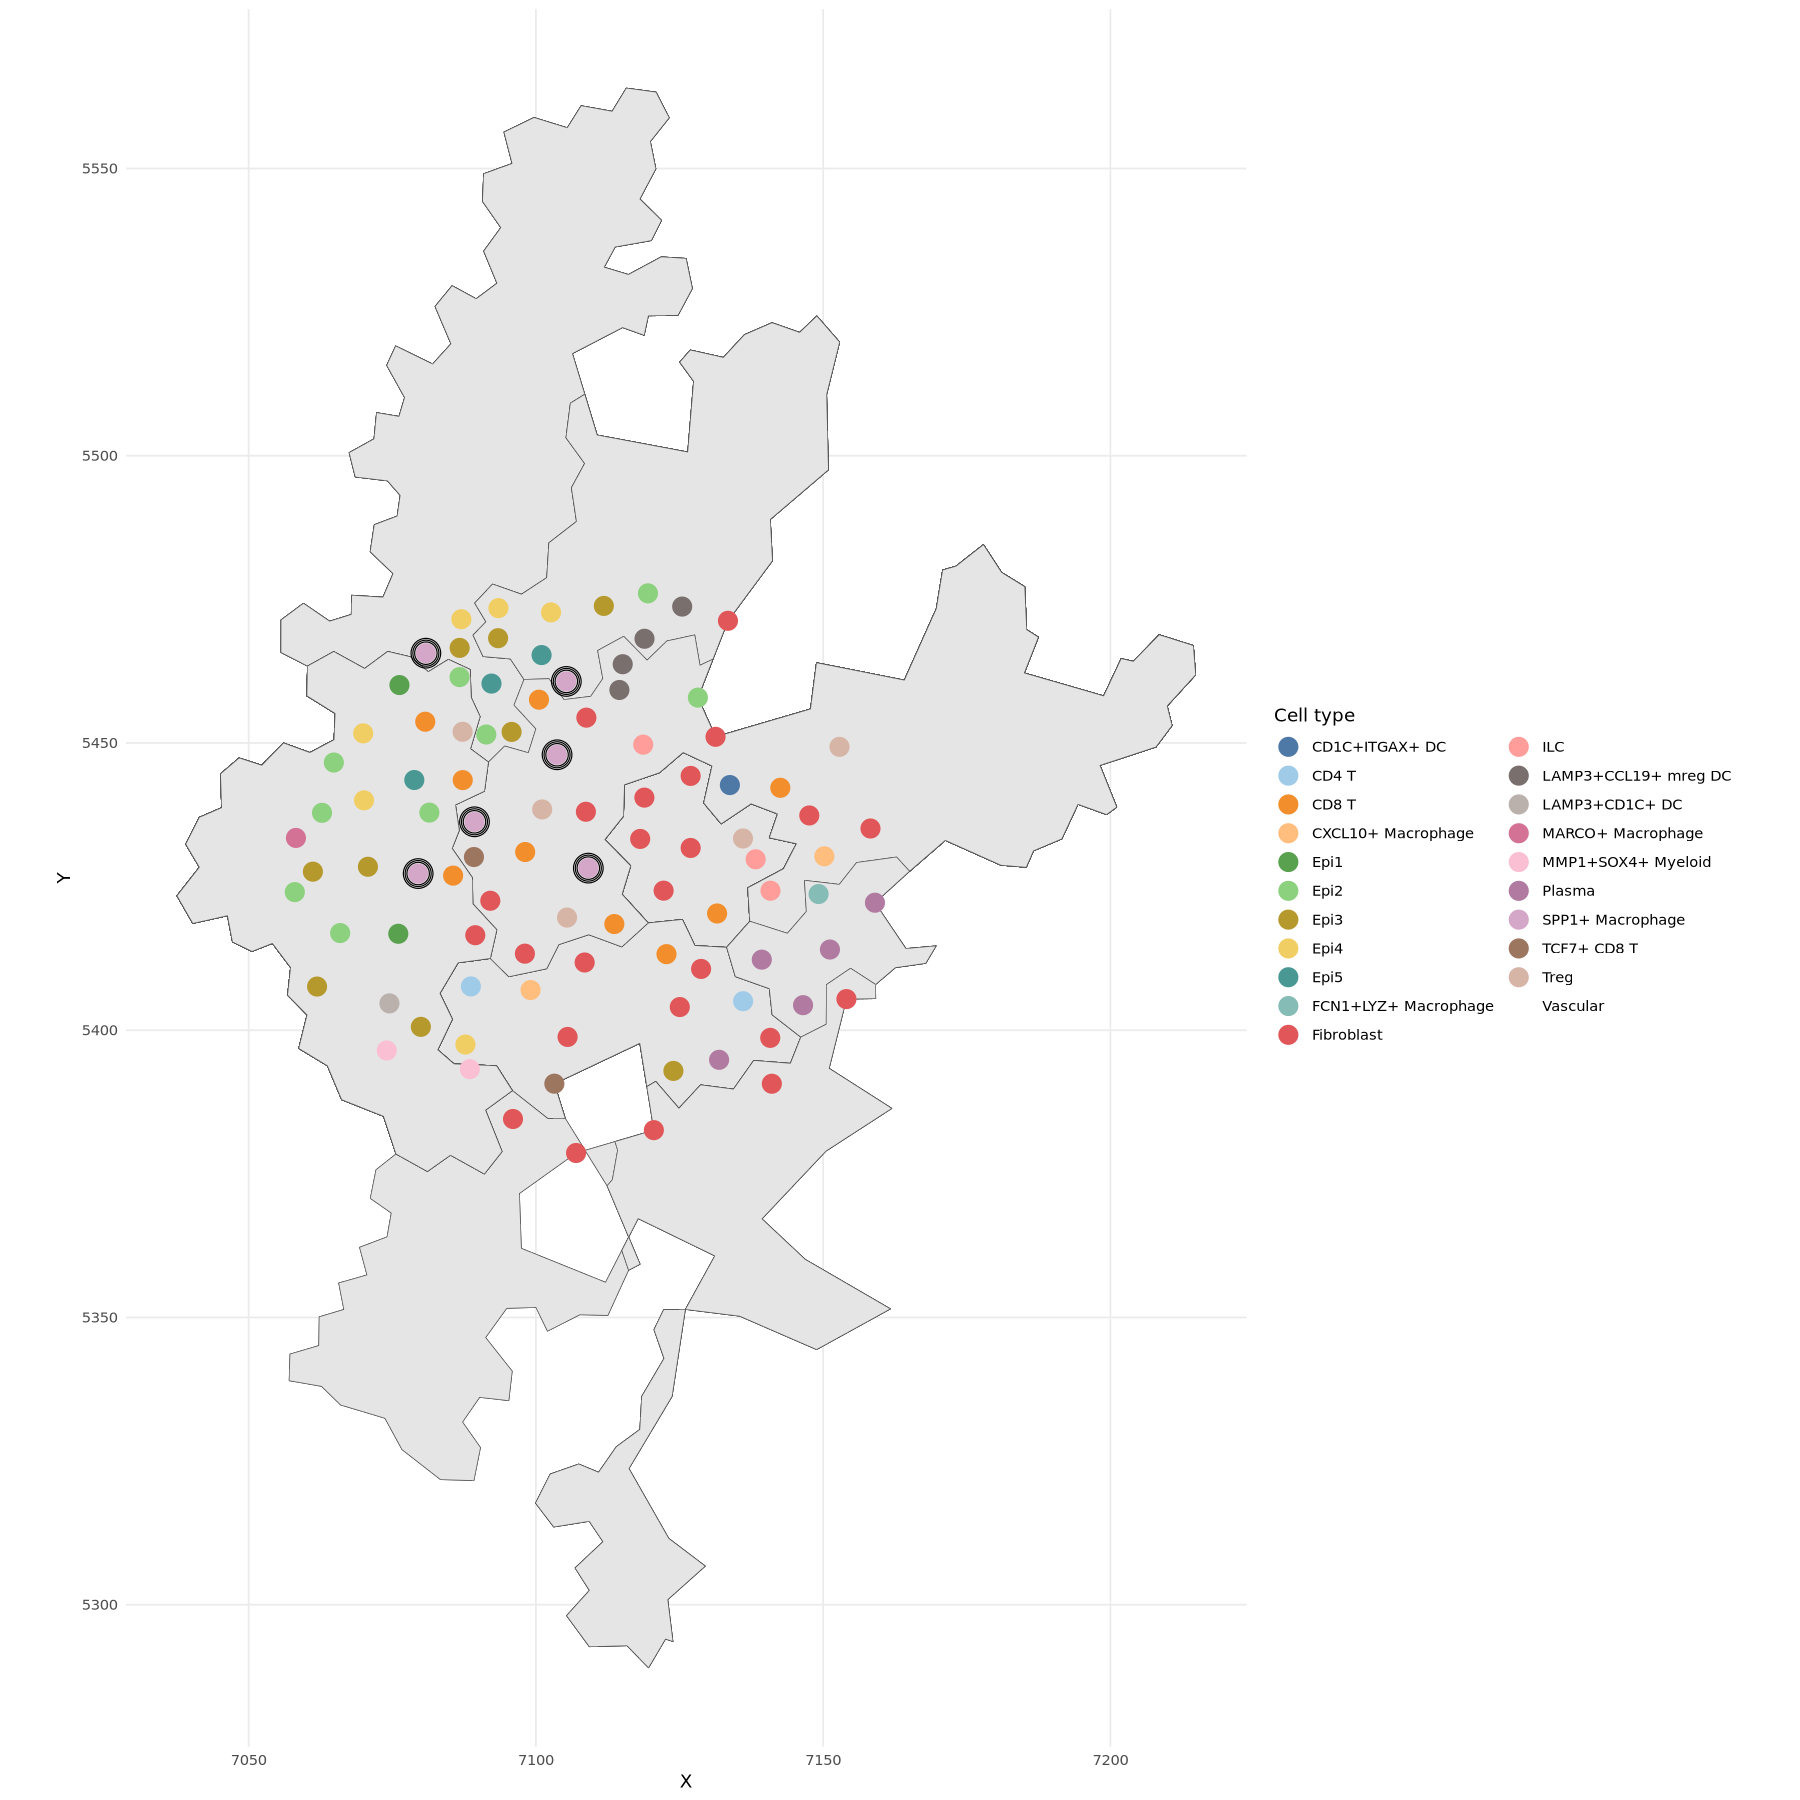

In [197]:
i = 15
mac_ex = spp1_100nn[i,]
mac_ex_indx = as.numeric(lapply(mac_ex, unique))
mac_ex_env = merge_df[mac_ex_indx, ]
plot_env(mac_ex_env, aggs1, size=5, width=15,height=15)